In [1]:
from bagboo import *
import numpy as np
import sklearn.datasets as ds
import pylab as pl
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import random as r
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
spam_train = np.loadtxt("./data/spam.train.txt")
spam_test = np.loadtxt("./data/spam.test.txt")
spam_train_data = spam_train[0::, 1::]
spam_train_target = spam_train[0::, 0]
spam_test_data = spam_test[0::, 1::]
spam_test_target = spam_test[0::, 0]
print "Train Dataset Shape: ", spam_train.shape
print "Test Dataset Shape: ", spam_test.shape

Train Dataset Shape:  (7093, 103)
Test Dataset Shape:  (10056, 103)


BagBoo Parametrs:
    1. N_Boo
    2. N_Bag
    3. bagging_ratio
    4. max_depth
    5. shrinkage

In [3]:
log = open("./spam_stat_log.txt", "a")

In [4]:
#fixed N_Boo * N_Bag = 1000
def calculate_statistics_bag_boo (param = 1000, step = 30, begin_value = 1,\
                                  max_depth = 2, bagging_ratio = 0.03, shrinkage = 0.01):
    bag_iter_list = [begin_value + step * i for i in range(param/step)]
    boo_iter_list = [int(param / float(bag)) + 1 for bag in bag_iter_list[:]]
    error_statistic = []
#     print bag_iter_list
#     print boo_iter_list
    log.write(str(bagging_ratio) + "\n")
    log.flush()
    for exp in range(len(bag_iter_list)):
#         print exp, boo_iter_list[exp], bag_iter_list[exp]
        print "Experiment: "+ str(exp) + "/" + str(len(bag_iter_list)) + \
                "\tBagging Iteration: " + str(bag_iter_list[exp]) + \
                    "\tBoosting Iteration: " + str(boo_iter_list[exp])
        
        bagboo_spam = BagBoo(n_boo= boo_iter_list[exp], n_bag=bag_iter_list[exp], \
                             bagging_ratio=bagging_ratio, max_depth=max_depth)
        
        bagboo_spam.fit(spam_train_data, spam_train_target)
        error = MSE(bagboo_spam.predict(spam_test_data), spam_test_target)
        error_statistic.append(error)
        log.write(str(boo_iter_list[exp]) + " " + str(bag_iter_list[exp]) + " " + str(error) + "\n")
        log.flush()
        print "\tMSE error: " + str(error)
    
    return error_statistic, bag_iter_list

In [11]:
%%time
error_stat, bag_list = calculate_statistics_bag_boo()

Experiment: 0/33	Bagging Iteration: 1	Boosting Iteration: 1001


Learning estimator number: 1000/1001; MSE error on train dataset: 1.49998093831e-06

	MSE error: 0.517597897004
Experiment: 1/33	Bagging Iteration: 31	Boosting Iteration: 33


Learning estimator number: 32/33; MSE error on train dataset: 0.0421686629702

	MSE error: 0.28491740881
Experiment: 2/33	Bagging Iteration: 61	Boosting Iteration: 17


Learning estimator number: 16/17; MSE error on train dataset: 0.0536411928044

	MSE error: 0.25811702877
Experiment: 3/33	Bagging Iteration: 91	Boosting Iteration: 11


Learning estimator number: 10/11; MSE error on train dataset: 0.0803271673807

	MSE error: 0.254706821789
Experiment: 4/33	Bagging Iteration: 121	Boosting Iteration: 9


Learning estimator number: 8/9; MSE error on train dataset: 0.0702005505322

	MSE error: 0.264795879313
Experiment: 5/33	Bagging Iteration: 151	Boosting Iteration: 7


Learning estimator number: 6/7; MSE error on train dataset: 0.059949684112

	MSE error: 0.265060821765
Experiment: 6/33	Bagging Iteration: 181	Boosting Iteration: 6


Learning estimator number: 5/6; MSE error on train dataset: 0.0661148450105

	MSE error: 0.298476653389
Experiment: 7/33	Bagging Iteration: 211	Boosting Iteration: 5


Learning estimator number: 4/5; MSE error on train dataset: 0.0709034306198

	MSE error: 0.26810213596
Experiment: 8/33	Bagging Iteration: 241	Boosting Iteration: 5


Learning estimator number: 4/5; MSE error on train dataset: 0.0726374145388

	MSE error: 0.320203668034
Experiment: 9/33	Bagging Iteration: 271	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 0.0877794711234

	MSE error: 0.292180508973
Experiment: 10/33	Bagging Iteration: 301	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 0.0746283435126

	MSE error: 0.314671686924
Experiment: 11/33	Bagging Iteration: 331	Boosting Iteration: 4


Learning estimator number: 3/4; MSE error on train dataset: 0.0832498479969

	MSE error: 0.293921782833
Experiment: 12/33	Bagging Iteration: 361	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 0.0835244217206

	MSE error: 0.288459422664
Experiment: 13/33	Bagging Iteration: 391	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 0.0843678531591

	MSE error: 0.276522326244
Experiment: 14/33	Bagging Iteration: 421	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 0.0890420037043

	MSE error: 0.287527085725
Experiment: 15/33	Bagging Iteration: 451	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 0.0809148784707

	MSE error: 0.290802778926
Experiment: 16/33	Bagging Iteration: 481	Boosting Iteration: 3


Learning estimator number: 2/3; MSE error on train dataset: 0.0786906303309

	MSE error: 0.303110076197
Experiment: 17/33	Bagging Iteration: 511	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0921837831061

	MSE error: 0.295297172903
Experiment: 18/33	Bagging Iteration: 541	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.103533080478

	MSE error: 0.295287990751
Experiment: 19/33	Bagging Iteration: 571	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0901109303178

	MSE error: 0.307469152809
Experiment: 20/33	Bagging Iteration: 601	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0740434828319

	MSE error: 0.312617188895
Experiment: 21/33	Bagging Iteration: 631	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0713084698345

	MSE error: 0.312818595917
Experiment: 22/33	Bagging Iteration: 661	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0854242671565

	MSE error: 0.287603691088
Experiment: 23/33	Bagging Iteration: 691	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0960170177294

	MSE error: 0.30303858426
Experiment: 24/33	Bagging Iteration: 721	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.101766589321

	MSE error: 0.308477006158
Experiment: 25/33	Bagging Iteration: 751	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0781525696541

	MSE error: 0.281011978039
Experiment: 26/33	Bagging Iteration: 781	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0736823408627

	MSE error: 0.295069527266
Experiment: 27/33	Bagging Iteration: 811	Boosting Iteration: 2


Learning estimator number: 1/2; MSE error on train dataset: 0.0925678290958

	MSE error: 0.297513493308
Experiment: 28/33	Bagging Iteration: 841	Boosting Iteration: 2


Iteration of bagging:540/841

KeyboardInterrupt: 

In [14]:
%%time
bagboo_spam = BagBoo(n_boo=60, n_bag=300, bagging_ratio=0.01, max_depth=2)    
bagboo_spam.fit(spam_train_data, spam_train_target)

print "MSE Error on test dataset: ", MSE(bagboo_spam.predict(spam_test_data), spam_test_target)

Learning estimator number: 59/60; MSE error on train dataset: 1.73241250008e-05

MSE Error on test dataset:  0.159302789863
CPU times: user 1h 55min 32s, sys: 11.2 s, total: 1h 55min 43s
Wall time: 1h 55min 52s


In [11]:
%%time
bagboo_spam = BagBoo(n_boo=50, n_bag=100, bagging_ratio=0.05, max_depth = 2, shrinkage=0.2)    
error_statistic_2 = bagboo_spam.fit(spam_train_data, spam_train_target, verbose = 1, X_test = spam_test_data,\
                Y_test = spam_test_target)

Learning estimator number: 49/50; MSE error on train dataset: 0.00367691204827

MSE on test Dataset: 0.436799932925 Iteration of Bagging: 0 / 100
MSE on train Dataset: 0.104497451025 Iteration of Bagging: 0 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00220248633697

MSE on test Dataset: 0.526057450741 Iteration of Bagging: 1 / 100
MSE on train Dataset: 0.0929051682463 Iteration of Bagging: 1 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00631821541661

MSE on test Dataset: 0.352485626312 Iteration of Bagging: 2 / 100
MSE on train Dataset: 0.0705254652551 Iteration of Bagging: 2 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00516703631604

MSE on test Dataset: 0.360948419483 Iteration of Bagging: 3 / 100
MSE on train Dataset: 0.0644606762221 Iteration of Bagging: 3 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00422933896233

MSE on test Dataset: 0.35803633324 Iteration of Bagging: 4 / 100
MSE on train Dataset: 0.0597948392148 Iteration of Bagging: 4 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00274616802291

MSE on test Dataset: 0.357327759828 Iteration of Bagging: 5 / 100
MSE on train Dataset: 0.0590892317987 Iteration of Bagging: 5 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00311667958482

MSE on test Dataset: 0.328519360377 Iteration of Bagging: 6 / 100
MSE on train Dataset: 0.0570917929103 Iteration of Bagging: 6 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00189475851125

MSE on test Dataset: 0.349197833673 Iteration of Bagging: 7 / 100
MSE on train Dataset: 0.0553545448968 Iteration of Bagging: 7 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00309269003707

MSE on test Dataset: 0.30116738956 Iteration of Bagging: 8 / 100
MSE on train Dataset: 0.0533939966249 Iteration of Bagging: 8 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00363072311186

MSE on test Dataset: 0.316254312092 Iteration of Bagging: 9 / 100
MSE on train Dataset: 0.0523837659136 Iteration of Bagging: 9 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00269711827009

MSE on test Dataset: 0.297972059265 Iteration of Bagging: 10 / 100
MSE on train Dataset: 0.0521345747785 Iteration of Bagging: 10 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00385367112644

MSE on test Dataset: 0.299215089472 Iteration of Bagging: 11 / 100
MSE on train Dataset: 0.0522289471888 Iteration of Bagging: 11 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00452854827436

MSE on test Dataset: 0.285944129938 Iteration of Bagging: 12 / 100
MSE on train Dataset: 0.0524304560732 Iteration of Bagging: 12 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00187091043462

MSE on test Dataset: 0.273752381532 Iteration of Bagging: 13 / 100
MSE on train Dataset: 0.0526232107711 Iteration of Bagging: 13 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00327027260426

MSE on test Dataset: 0.250679954126 Iteration of Bagging: 14 / 100
MSE on train Dataset: 0.0515273072529 Iteration of Bagging: 14 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00249506891981

MSE on test Dataset: 0.263428804641 Iteration of Bagging: 15 / 100
MSE on train Dataset: 0.0516186200835 Iteration of Bagging: 15 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00306143097362

MSE on test Dataset: 0.256164349691 Iteration of Bagging: 16 / 100
MSE on train Dataset: 0.0516188746663 Iteration of Bagging: 16 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00377566425115

MSE on test Dataset: 0.265016778617 Iteration of Bagging: 17 / 100
MSE on train Dataset: 0.0514385066737 Iteration of Bagging: 17 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00285914203488

MSE on test Dataset: 0.269217240252 Iteration of Bagging: 18 / 100
MSE on train Dataset: 0.0511889026865 Iteration of Bagging: 18 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00272072949319

MSE on test Dataset: 0.244476704814 Iteration of Bagging: 19 / 100
MSE on train Dataset: 0.0513313384773 Iteration of Bagging: 19 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00327561212509

MSE on test Dataset: 0.249051101385 Iteration of Bagging: 20 / 100
MSE on train Dataset: 0.0511513460679 Iteration of Bagging: 20 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00628709791087

MSE on test Dataset: 0.236851763281 Iteration of Bagging: 21 / 100
MSE on train Dataset: 0.0500670191901 Iteration of Bagging: 21 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00318589348468

MSE on test Dataset: 0.24662557618 Iteration of Bagging: 22 / 100
MSE on train Dataset: 0.0505588698626 Iteration of Bagging: 22 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00437972039886

MSE on test Dataset: 0.253188308439 Iteration of Bagging: 23 / 100
MSE on train Dataset: 0.0505576422591 Iteration of Bagging: 23 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00229392558542

MSE on test Dataset: 0.260362405288 Iteration of Bagging: 24 / 100
MSE on train Dataset: 0.0507876810687 Iteration of Bagging: 24 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00502444089847

MSE on test Dataset: 0.269109966204 Iteration of Bagging: 25 / 100
MSE on train Dataset: 0.0505077332978 Iteration of Bagging: 25 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00372426228235

MSE on test Dataset: 0.271759099446 Iteration of Bagging: 26 / 100
MSE on train Dataset: 0.0504308590127 Iteration of Bagging: 26 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00402868580402

MSE on test Dataset: 0.27680605516 Iteration of Bagging: 27 / 100
MSE on train Dataset: 0.0500380557071 Iteration of Bagging: 27 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00328538452296

MSE on test Dataset: 0.271833747586 Iteration of Bagging: 28 / 100
MSE on train Dataset: 0.0498817914883 Iteration of Bagging: 28 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00466342873997

MSE on test Dataset: 0.27761448777 Iteration of Bagging: 29 / 100
MSE on train Dataset: 0.0499360335273 Iteration of Bagging: 29 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00552504354281

MSE on test Dataset: 0.286641154044 Iteration of Bagging: 30 / 100
MSE on train Dataset: 0.0498003809683 Iteration of Bagging: 30 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00505157421539

MSE on test Dataset: 0.282524813502 Iteration of Bagging: 31 / 100
MSE on train Dataset: 0.0495644159867 Iteration of Bagging: 31 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00307698711269

MSE on test Dataset: 0.261378440196 Iteration of Bagging: 32 / 100
MSE on train Dataset: 0.0497956638064 Iteration of Bagging: 32 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00377091114403

MSE on test Dataset: 0.257255792297 Iteration of Bagging: 33 / 100
MSE on train Dataset: 0.0491406342639 Iteration of Bagging: 33 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00402148020557

MSE on test Dataset: 0.260893323227 Iteration of Bagging: 34 / 100
MSE on train Dataset: 0.049285154157 Iteration of Bagging: 34 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00443774463827

MSE on test Dataset: 0.2633275024 Iteration of Bagging: 35 / 100
MSE on train Dataset: 0.0493651190514 Iteration of Bagging: 35 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00324332838445

MSE on test Dataset: 0.263245451186 Iteration of Bagging: 36 / 100
MSE on train Dataset: 0.049617011586 Iteration of Bagging: 36 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00322244572058

MSE on test Dataset: 0.259329764397 Iteration of Bagging: 37 / 100
MSE on train Dataset: 0.0489989440283 Iteration of Bagging: 37 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00314644979846

MSE on test Dataset: 0.266561447585 Iteration of Bagging: 38 / 100
MSE on train Dataset: 0.0491170969966 Iteration of Bagging: 38 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00192121233728

MSE on test Dataset: 0.26988318543 Iteration of Bagging: 39 / 100
MSE on train Dataset: 0.0490818301276 Iteration of Bagging: 39 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00474161390466

MSE on test Dataset: 0.275624048874 Iteration of Bagging: 40 / 100
MSE on train Dataset: 0.0490603663915 Iteration of Bagging: 40 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00328993265543

MSE on test Dataset: 0.271460372502 Iteration of Bagging: 41 / 100
MSE on train Dataset: 0.0485346236231 Iteration of Bagging: 41 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00506971898467

MSE on test Dataset: 0.2675847633 Iteration of Bagging: 42 / 100
MSE on train Dataset: 0.0482012978636 Iteration of Bagging: 42 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.003399978103

MSE on test Dataset: 0.265069585281 Iteration of Bagging: 43 / 100
MSE on train Dataset: 0.0479261775325 Iteration of Bagging: 43 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00331611554895

MSE on test Dataset: 0.256586013243 Iteration of Bagging: 44 / 100
MSE on train Dataset: 0.0475654994636 Iteration of Bagging: 44 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00522371847003

MSE on test Dataset: 0.259102036717 Iteration of Bagging: 45 / 100
MSE on train Dataset: 0.0473814519888 Iteration of Bagging: 45 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00296607512037

MSE on test Dataset: 0.252708515027 Iteration of Bagging: 46 / 100
MSE on train Dataset: 0.0470368813879 Iteration of Bagging: 46 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00542661761793

MSE on test Dataset: 0.259133439442 Iteration of Bagging: 47 / 100
MSE on train Dataset: 0.0470089166804 Iteration of Bagging: 47 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00512911564947

MSE on test Dataset: 0.254506438597 Iteration of Bagging: 48 / 100
MSE on train Dataset: 0.0467956647491 Iteration of Bagging: 48 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00305503634216

MSE on test Dataset: 0.256492028806 Iteration of Bagging: 49 / 100
MSE on train Dataset: 0.0468922629262 Iteration of Bagging: 49 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00319798509076

MSE on test Dataset: 0.256280753092 Iteration of Bagging: 50 / 100
MSE on train Dataset: 0.0467956739684 Iteration of Bagging: 50 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00345326804112

MSE on test Dataset: 0.259136466169 Iteration of Bagging: 51 / 100
MSE on train Dataset: 0.0467960288159 Iteration of Bagging: 51 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00191859612949

MSE on test Dataset: 0.264937001369 Iteration of Bagging: 52 / 100
MSE on train Dataset: 0.0470436292918 Iteration of Bagging: 52 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00198993569483

MSE on test Dataset: 0.268511062024 Iteration of Bagging: 53 / 100
MSE on train Dataset: 0.0469635367858 Iteration of Bagging: 53 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00300672360823

MSE on test Dataset: 0.261000555354 Iteration of Bagging: 54 / 100
MSE on train Dataset: 0.0467076603808 Iteration of Bagging: 54 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00215510348282

MSE on test Dataset: 0.256817595245 Iteration of Bagging: 55 / 100
MSE on train Dataset: 0.0466578634623 Iteration of Bagging: 55 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00227029965637

MSE on test Dataset: 0.260242615793 Iteration of Bagging: 56 / 100
MSE on train Dataset: 0.0466872440872 Iteration of Bagging: 56 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.004829265004

MSE on test Dataset: 0.260856331566 Iteration of Bagging: 57 / 100
MSE on train Dataset: 0.0466220769037 Iteration of Bagging: 57 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00414711466365

MSE on test Dataset: 0.262110089109 Iteration of Bagging: 58 / 100
MSE on train Dataset: 0.0466547009549 Iteration of Bagging: 58 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.0041902198487

MSE on test Dataset: 0.262205675977 Iteration of Bagging: 59 / 100
MSE on train Dataset: 0.0465843268039 Iteration of Bagging: 59 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00314982584275

MSE on test Dataset: 0.262279739307 Iteration of Bagging: 60 / 100
MSE on train Dataset: 0.0466451393889 Iteration of Bagging: 60 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00317265435733

MSE on test Dataset: 0.259927304353 Iteration of Bagging: 61 / 100
MSE on train Dataset: 0.0466050741618 Iteration of Bagging: 61 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00294233036709

MSE on test Dataset: 0.259761487906 Iteration of Bagging: 62 / 100
MSE on train Dataset: 0.0466624306386 Iteration of Bagging: 62 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00422526384157

MSE on test Dataset: 0.259794121552 Iteration of Bagging: 63 / 100
MSE on train Dataset: 0.0466901450802 Iteration of Bagging: 63 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00395932833109

MSE on test Dataset: 0.261551758891 Iteration of Bagging: 64 / 100
MSE on train Dataset: 0.0466181997106 Iteration of Bagging: 64 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00257249265804

MSE on test Dataset: 0.257380314509 Iteration of Bagging: 65 / 100
MSE on train Dataset: 0.0466479952415 Iteration of Bagging: 65 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00395832222422

MSE on test Dataset: 0.259030679285 Iteration of Bagging: 66 / 100
MSE on train Dataset: 0.0467284241669 Iteration of Bagging: 66 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00516554364324

MSE on test Dataset: 0.260266414875 Iteration of Bagging: 67 / 100
MSE on train Dataset: 0.0466988297086 Iteration of Bagging: 67 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00346960705709

MSE on test Dataset: 0.262670570573 Iteration of Bagging: 68 / 100
MSE on train Dataset: 0.0466722422849 Iteration of Bagging: 68 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00326329809422

MSE on test Dataset: 0.25830267793 Iteration of Bagging: 69 / 100
MSE on train Dataset: 0.0464921288322 Iteration of Bagging: 69 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00214531873891

MSE on test Dataset: 0.259314846847 Iteration of Bagging: 70 / 100
MSE on train Dataset: 0.0465534742343 Iteration of Bagging: 70 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00345905863298

MSE on test Dataset: 0.263414872646 Iteration of Bagging: 71 / 100
MSE on train Dataset: 0.0466246062386 Iteration of Bagging: 71 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.0048074446528

MSE on test Dataset: 0.258621342191 Iteration of Bagging: 72 / 100
MSE on train Dataset: 0.0464557306212 Iteration of Bagging: 72 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00481512583144

MSE on test Dataset: 0.256473749675 Iteration of Bagging: 73 / 100
MSE on train Dataset: 0.0464808981635 Iteration of Bagging: 73 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00448035411578

MSE on test Dataset: 0.260770437214 Iteration of Bagging: 74 / 100
MSE on train Dataset: 0.0464797833894 Iteration of Bagging: 74 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00417633644293

MSE on test Dataset: 0.262416429804 Iteration of Bagging: 75 / 100
MSE on train Dataset: 0.0464906042523 Iteration of Bagging: 75 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00441111926436

MSE on test Dataset: 0.26317201896 Iteration of Bagging: 76 / 100
MSE on train Dataset: 0.0464895779325 Iteration of Bagging: 76 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00331710388807

MSE on test Dataset: 0.260484990853 Iteration of Bagging: 77 / 100
MSE on train Dataset: 0.0465746805002 Iteration of Bagging: 77 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00280231190214

MSE on test Dataset: 0.257320286474 Iteration of Bagging: 78 / 100
MSE on train Dataset: 0.0464536723517 Iteration of Bagging: 78 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00359477772731

MSE on test Dataset: 0.256719321543 Iteration of Bagging: 79 / 100
MSE on train Dataset: 0.0464078648627 Iteration of Bagging: 79 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00416094479984

MSE on test Dataset: 0.259912626604 Iteration of Bagging: 80 / 100
MSE on train Dataset: 0.0464551130155 Iteration of Bagging: 80 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00391301006373

MSE on test Dataset: 0.261068144983 Iteration of Bagging: 81 / 100
MSE on train Dataset: 0.0464883376187 Iteration of Bagging: 81 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00221615222357

MSE on test Dataset: 0.258412673809 Iteration of Bagging: 82 / 100
MSE on train Dataset: 0.0463336841324 Iteration of Bagging: 82 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00214615910406

MSE on test Dataset: 0.261067859154 Iteration of Bagging: 83 / 100
MSE on train Dataset: 0.0463697087052 Iteration of Bagging: 83 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00279976997049

MSE on test Dataset: 0.26177236053 Iteration of Bagging: 84 / 100
MSE on train Dataset: 0.0463741696784 Iteration of Bagging: 84 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00343136855089

MSE on test Dataset: 0.26558612184 Iteration of Bagging: 85 / 100
MSE on train Dataset: 0.0464529948525 Iteration of Bagging: 85 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00551850230104

MSE on test Dataset: 0.262349534421 Iteration of Bagging: 86 / 100
MSE on train Dataset: 0.0463015788261 Iteration of Bagging: 86 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00257190558224

MSE on test Dataset: 0.258640074695 Iteration of Bagging: 87 / 100
MSE on train Dataset: 0.0462346430609 Iteration of Bagging: 87 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00442893548722

MSE on test Dataset: 0.25969679171 Iteration of Bagging: 88 / 100
MSE on train Dataset: 0.0463557447932 Iteration of Bagging: 88 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00241761514494

MSE on test Dataset: 0.261320798867 Iteration of Bagging: 89 / 100
MSE on train Dataset: 0.0463862565168 Iteration of Bagging: 89 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00382949274682

MSE on test Dataset: 0.262891727415 Iteration of Bagging: 90 / 100
MSE on train Dataset: 0.0464219998946 Iteration of Bagging: 90 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00459013691197

MSE on test Dataset: 0.264750999372 Iteration of Bagging: 91 / 100
MSE on train Dataset: 0.0464560113883 Iteration of Bagging: 91 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00439858509164

MSE on test Dataset: 0.266300133587 Iteration of Bagging: 92 / 100
MSE on train Dataset: 0.0464442720676 Iteration of Bagging: 92 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00363693038637

MSE on test Dataset: 0.267352042169 Iteration of Bagging: 93 / 100
MSE on train Dataset: 0.0464991713808 Iteration of Bagging: 93 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00380319413681

MSE on test Dataset: 0.268130735771 Iteration of Bagging: 94 / 100
MSE on train Dataset: 0.0465254470246 Iteration of Bagging: 94 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00498412751866

MSE on test Dataset: 0.268464763502 Iteration of Bagging: 95 / 100
MSE on train Dataset: 0.0465040533405 Iteration of Bagging: 95 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00489615698635

MSE on test Dataset: 0.271373120365 Iteration of Bagging: 96 / 100
MSE on train Dataset: 0.0464873192732 Iteration of Bagging: 96 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00369540522398

MSE on test Dataset: 0.271630064048 Iteration of Bagging: 97 / 100
MSE on train Dataset: 0.0464925159203 Iteration of Bagging: 97 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00278284959295

MSE on test Dataset: 0.270766436562 Iteration of Bagging: 98 / 100
MSE on train Dataset: 0.0465296822502 Iteration of Bagging: 98 / 100


Learning estimator number: 49/50; MSE error on train dataset: 0.00625699212707

MSE on test Dataset: 0.271200010831 Iteration of Bagging: 99 / 100
MSE on train Dataset: 0.0464528709051 Iteration of Bagging: 99 / 100
CPU times: user 5h 7min 16s, sys: 6.4 s, total: 5h 7min 23s
Wall time: 5h 7min 19s


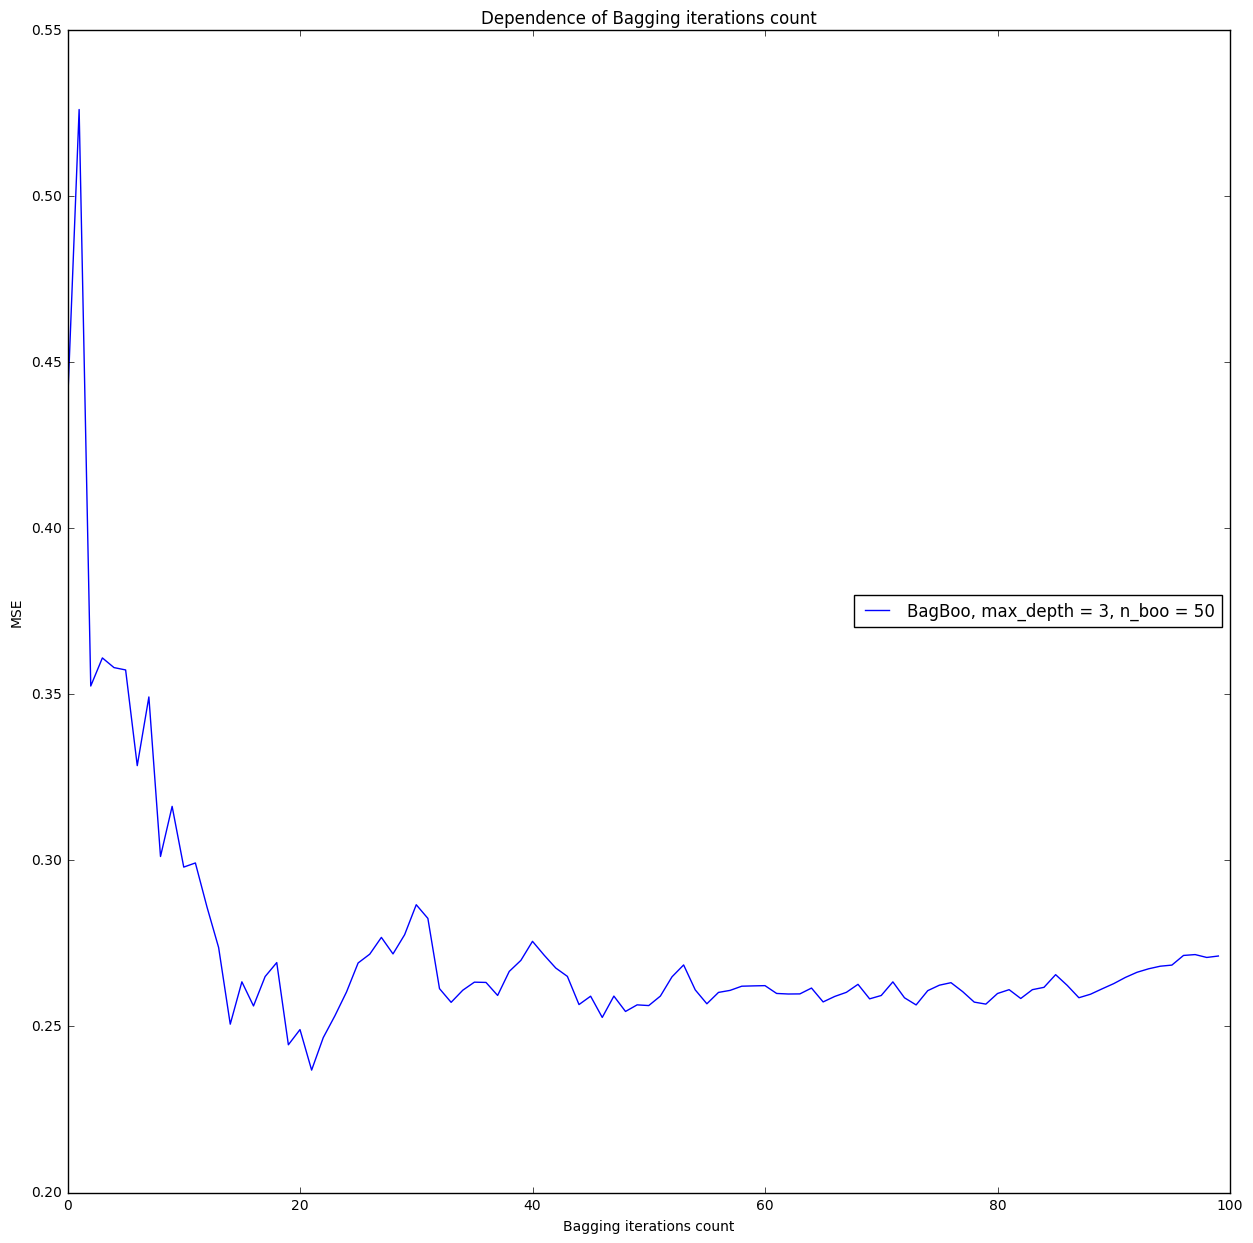

In [12]:
fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(range(0, 100), error_statistic_2, label='BagBoo, max_depth = 3, n_boo = 50')
ax.legend(loc='right')
ax.set_title('Dependence of Bagging iterations count')
ax.set_xlabel('Bagging iterations count')
ax.set_ylabel('MSE')

In [ ]:
bagboo_spam = BagBoo(n_boo=30, n_bag=300, bagging_ratio=0.03, max_depth=3, shrinkage=0.1)    
error_statistic_3 = bagboo_spam.fit(spam_train_data, spam_train_target, verbose = 1, X_test = spam_test_data,\
                Y_test = spam_test_target)

bagboo_spam = BagBoo(n_boo=30, n_bag=300, bagging_ratio=0.03, max_depth=4, shrinkage=0.1)    
error_statistic_4 = bagboo_spam.fit(spam_train_data, spam_train_target, verbose = 1, X_test = spam_test_data,\
                Y_test = spam_test_target)

In [9]:
error_statistic_2 = error_statistic

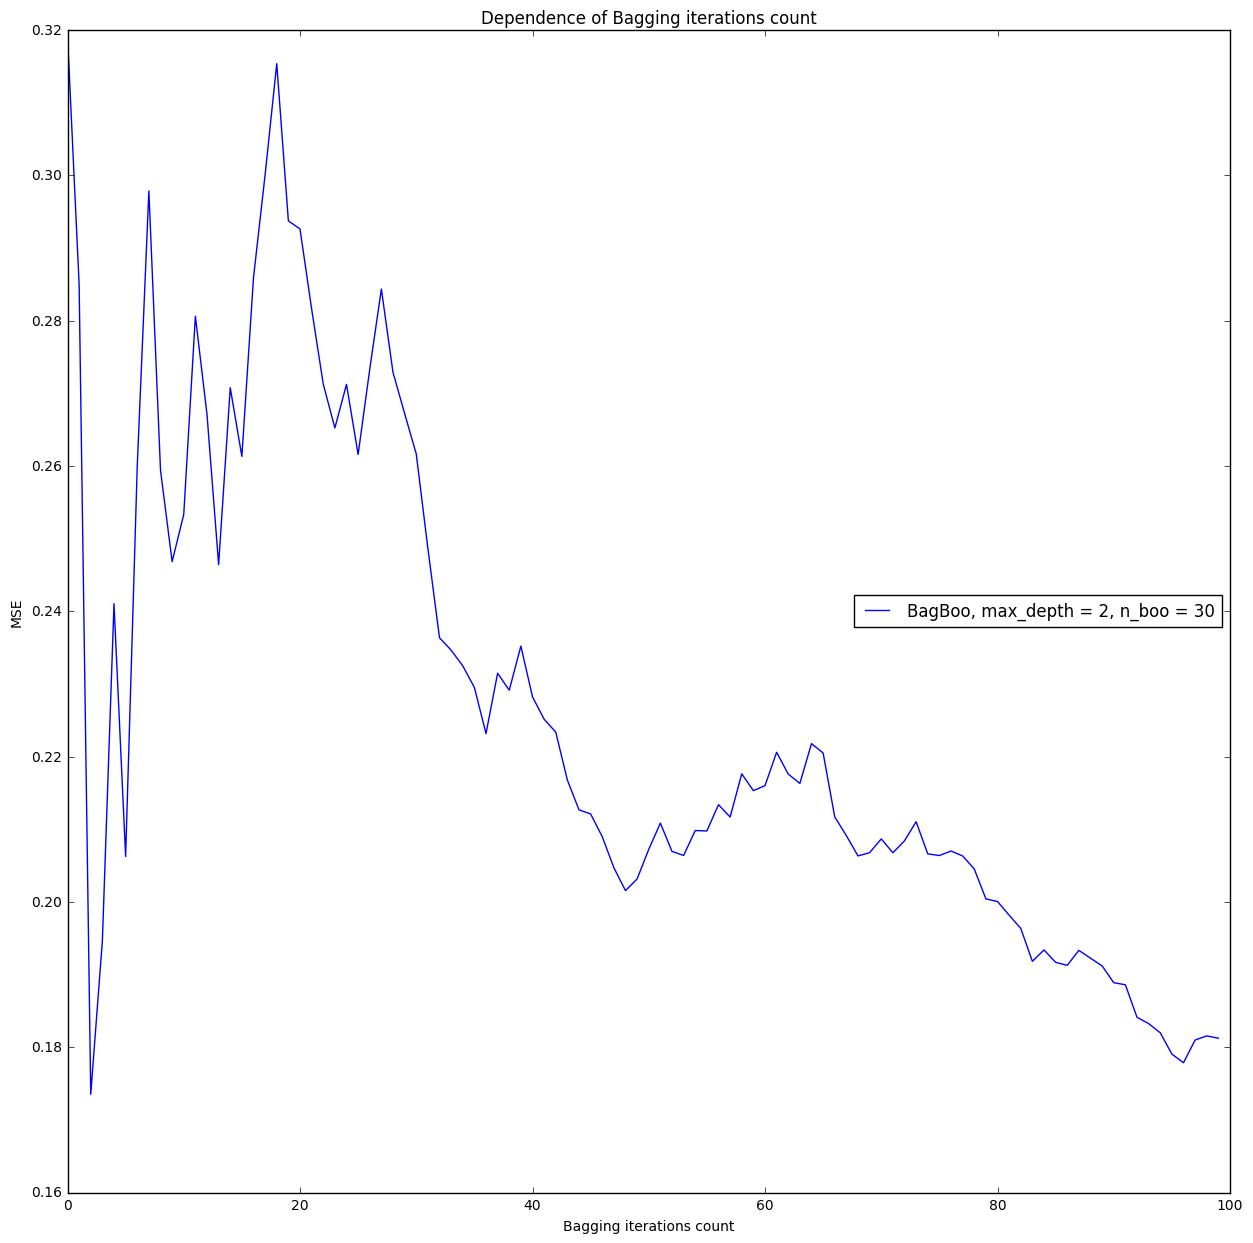

In [10]:
fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(range(0, 100), error_statistic_2, label='BagBoo, max_depth = 2, n_boo = 30')
ax.legend(loc='right')
ax.set_title('Dependence of Bagging iterations count')
ax.set_xlabel('Bagging iterations count')
ax.set_ylabel('MSE')

In [7]:
%%time
skl_gb_spam = GradientBoostingRegressor(criterion='mse', min_impurity_split=0, verbose=2, learning_rate=0.1)
skl_gb_spam.fit(spam_train_data, spam_train_target)
# print "MSE Error on train dataset: ", MSE(skl_gb_house.predict(house_data[:400]), house_target[:400])
print "MSE Error on test dataset: ", MSE( skl_gb_spam.predict(spam_test_data), spam_test_target)

      Iter       Train Loss   Remaining Time 
         1           0.2150            7.57s
         2           0.1916            5.98s
         3           0.1723            5.37s
         4           0.1562            5.23s
         5           0.1413            5.16s
         6           0.1291            4.86s
         7           0.1195            4.62s
         8           0.1097            4.47s
         9           0.1013            4.44s
        10           0.0942            4.41s
        11           0.0876            4.30s
        12           0.0821            4.21s
        13           0.0771            4.11s
        14           0.0726            4.09s
        15           0.0691            4.10s
        16           0.0659            4.03s
        17           0.0632            3.94s
        18           0.0605            3.87s
        19           0.0583            3.86s
        20           0.0558            3.79s
        21           0.0539            3.73s
        2

In [18]:
%%time
bagboo_spam = BagBoo(n_boo=15, n_bag=600, bagging_ratio=0.02, max_depth = 3, shrinkage=0.1)    
error_statistic_2 = bagboo_spam.fit(spam_train_data, spam_train_target, verbose = 1, X_test = spam_test_data,\
                Y_test = spam_test_target)

Learning estimator number: 14/15; MSE error on train dataset: 0.00516645848615

MSE on test Dataset: 0.659164344354 Iteration of Bagging: 0 / 600
MSE on train Dataset: 0.200581843692 Iteration of Bagging: 0 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0123316586497

MSE on test Dataset: 0.503771619842 Iteration of Bagging: 1 / 600
MSE on train Dataset: 0.121458049014 Iteration of Bagging: 1 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00422824589398

MSE on test Dataset: 0.314855428388 Iteration of Bagging: 2 / 600
MSE on train Dataset: 0.106263780834 Iteration of Bagging: 2 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0142310941767

MSE on test Dataset: 0.217181350404 Iteration of Bagging: 3 / 600
MSE on train Dataset: 0.0973819897264 Iteration of Bagging: 3 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.000367180832145

MSE on test Dataset: 0.177219236775 Iteration of Bagging: 4 / 600
MSE on train Dataset: 0.0895775133359 Iteration of Bagging: 4 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0027196695874

MSE on test Dataset: 0.165124430516 Iteration of Bagging: 5 / 600
MSE on train Dataset: 0.0816599944845 Iteration of Bagging: 5 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00789678862911

MSE on test Dataset: 0.150842201691 Iteration of Bagging: 6 / 600
MSE on train Dataset: 0.0798923488881 Iteration of Bagging: 6 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0139486265652

MSE on test Dataset: 0.138319761293 Iteration of Bagging: 7 / 600
MSE on train Dataset: 0.078317541869 Iteration of Bagging: 7 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00348551197715

MSE on test Dataset: 0.160848090342 Iteration of Bagging: 8 / 600
MSE on train Dataset: 0.0773550987926 Iteration of Bagging: 8 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0083652632808

MSE on test Dataset: 0.184583915528 Iteration of Bagging: 9 / 600
MSE on train Dataset: 0.0764154126624 Iteration of Bagging: 9 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00463994379042

MSE on test Dataset: 0.176827726139 Iteration of Bagging: 10 / 600
MSE on train Dataset: 0.0754374935288 Iteration of Bagging: 10 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.016484234701

MSE on test Dataset: 0.163030963233 Iteration of Bagging: 11 / 600
MSE on train Dataset: 0.0740527523573 Iteration of Bagging: 11 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0117038099217

MSE on test Dataset: 0.162374801707 Iteration of Bagging: 12 / 600
MSE on train Dataset: 0.0744391588908 Iteration of Bagging: 12 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00641867598876

MSE on test Dataset: 0.153981722948 Iteration of Bagging: 13 / 600
MSE on train Dataset: 0.0741021340059 Iteration of Bagging: 13 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00864393040379

MSE on test Dataset: 0.154754883763 Iteration of Bagging: 14 / 600
MSE on train Dataset: 0.0724612736194 Iteration of Bagging: 14 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0211095973342

MSE on test Dataset: 0.152214121365 Iteration of Bagging: 15 / 600
MSE on train Dataset: 0.0704490124096 Iteration of Bagging: 15 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0124117302481

MSE on test Dataset: 0.170364301218 Iteration of Bagging: 16 / 600
MSE on train Dataset: 0.0698423129233 Iteration of Bagging: 16 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00555950715992

MSE on test Dataset: 0.169959865651 Iteration of Bagging: 17 / 600
MSE on train Dataset: 0.0686197923943 Iteration of Bagging: 17 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0153494130184

MSE on test Dataset: 0.189012303286 Iteration of Bagging: 18 / 600
MSE on train Dataset: 0.0687964139566 Iteration of Bagging: 18 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0122275329685

MSE on test Dataset: 0.199171796856 Iteration of Bagging: 19 / 600
MSE on train Dataset: 0.0682460081779 Iteration of Bagging: 19 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00389684463722

MSE on test Dataset: 0.20686428598 Iteration of Bagging: 20 / 600
MSE on train Dataset: 0.0678084996378 Iteration of Bagging: 20 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0159016576163

MSE on test Dataset: 0.221158493128 Iteration of Bagging: 21 / 600
MSE on train Dataset: 0.0671314515445 Iteration of Bagging: 21 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00734575612258

MSE on test Dataset: 0.224161616194 Iteration of Bagging: 22 / 600
MSE on train Dataset: 0.0669872485792 Iteration of Bagging: 22 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0010364963541

MSE on test Dataset: 0.220174273755 Iteration of Bagging: 23 / 600
MSE on train Dataset: 0.0675566991346 Iteration of Bagging: 23 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00308899640309

MSE on test Dataset: 0.213388471403 Iteration of Bagging: 24 / 600
MSE on train Dataset: 0.0674993966674 Iteration of Bagging: 24 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0115272874915

MSE on test Dataset: 0.221075527762 Iteration of Bagging: 25 / 600
MSE on train Dataset: 0.0670403654076 Iteration of Bagging: 25 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0131670970995

MSE on test Dataset: 0.215189231078 Iteration of Bagging: 26 / 600
MSE on train Dataset: 0.0670402413693 Iteration of Bagging: 26 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114624746487

MSE on test Dataset: 0.22314373976 Iteration of Bagging: 27 / 600
MSE on train Dataset: 0.0674266104716 Iteration of Bagging: 27 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0143181232334

MSE on test Dataset: 0.227260660617 Iteration of Bagging: 28 / 600
MSE on train Dataset: 0.0668301837711 Iteration of Bagging: 28 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0155492538659

MSE on test Dataset: 0.225315497527 Iteration of Bagging: 29 / 600
MSE on train Dataset: 0.0667024502327 Iteration of Bagging: 29 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00369187746527

MSE on test Dataset: 0.232539635632 Iteration of Bagging: 30 / 600
MSE on train Dataset: 0.0665924336387 Iteration of Bagging: 30 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.015819299049

MSE on test Dataset: 0.235526791714 Iteration of Bagging: 31 / 600
MSE on train Dataset: 0.0668262248417 Iteration of Bagging: 31 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0116027943862

MSE on test Dataset: 0.244925021956 Iteration of Bagging: 32 / 600
MSE on train Dataset: 0.066210590359 Iteration of Bagging: 32 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0172503158533

MSE on test Dataset: 0.251706029745 Iteration of Bagging: 33 / 600
MSE on train Dataset: 0.0658687517993 Iteration of Bagging: 33 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0127174437617

MSE on test Dataset: 0.256645047176 Iteration of Bagging: 34 / 600
MSE on train Dataset: 0.0657543309454 Iteration of Bagging: 34 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00757470689203

MSE on test Dataset: 0.25807791773 Iteration of Bagging: 35 / 600
MSE on train Dataset: 0.0658246764449 Iteration of Bagging: 35 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00786533740982

MSE on test Dataset: 0.25518581729 Iteration of Bagging: 36 / 600
MSE on train Dataset: 0.0658679497144 Iteration of Bagging: 36 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00522327686836

MSE on test Dataset: 0.263135445297 Iteration of Bagging: 37 / 600
MSE on train Dataset: 0.065758787166 Iteration of Bagging: 37 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00691316319483

MSE on test Dataset: 0.25343248923 Iteration of Bagging: 38 / 600
MSE on train Dataset: 0.0653846129597 Iteration of Bagging: 38 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0106203261583

MSE on test Dataset: 0.255826051499 Iteration of Bagging: 39 / 600
MSE on train Dataset: 0.065479814294 Iteration of Bagging: 39 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00756984186743

MSE on test Dataset: 0.249759530528 Iteration of Bagging: 40 / 600
MSE on train Dataset: 0.0658973166916 Iteration of Bagging: 40 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00769316098122

MSE on test Dataset: 0.258408543795 Iteration of Bagging: 41 / 600
MSE on train Dataset: 0.0653877656825 Iteration of Bagging: 41 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0163838925231

MSE on test Dataset: 0.25185765308 Iteration of Bagging: 42 / 600
MSE on train Dataset: 0.0647165827629 Iteration of Bagging: 42 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00629377320468

MSE on test Dataset: 0.250224950954 Iteration of Bagging: 43 / 600
MSE on train Dataset: 0.0646478610045 Iteration of Bagging: 43 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0197579074709

MSE on test Dataset: 0.24530473034 Iteration of Bagging: 44 / 600
MSE on train Dataset: 0.064320541603 Iteration of Bagging: 44 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00706330870591

MSE on test Dataset: 0.250881658794 Iteration of Bagging: 45 / 600
MSE on train Dataset: 0.0643236123027 Iteration of Bagging: 45 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00293840183798

MSE on test Dataset: 0.245267431675 Iteration of Bagging: 46 / 600
MSE on train Dataset: 0.0643091639661 Iteration of Bagging: 46 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0152275748221

MSE on test Dataset: 0.242987888818 Iteration of Bagging: 47 / 600
MSE on train Dataset: 0.0644779272311 Iteration of Bagging: 47 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0184857386401

MSE on test Dataset: 0.249485085269 Iteration of Bagging: 48 / 600
MSE on train Dataset: 0.0647326738544 Iteration of Bagging: 48 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00775773090063

MSE on test Dataset: 0.243475105837 Iteration of Bagging: 49 / 600
MSE on train Dataset: 0.0646976655536 Iteration of Bagging: 49 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.017864397041

MSE on test Dataset: 0.248948832664 Iteration of Bagging: 50 / 600
MSE on train Dataset: 0.0643794765153 Iteration of Bagging: 50 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00964328285754

MSE on test Dataset: 0.24870819895 Iteration of Bagging: 51 / 600
MSE on train Dataset: 0.0641299195176 Iteration of Bagging: 51 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0108570309948

MSE on test Dataset: 0.249911394607 Iteration of Bagging: 52 / 600
MSE on train Dataset: 0.0639171960847 Iteration of Bagging: 52 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0143774233857

MSE on test Dataset: 0.250555300721 Iteration of Bagging: 53 / 600
MSE on train Dataset: 0.0641031636639 Iteration of Bagging: 53 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0041665237406

MSE on test Dataset: 0.25329981684 Iteration of Bagging: 54 / 600
MSE on train Dataset: 0.0641594875506 Iteration of Bagging: 54 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0127078613838

MSE on test Dataset: 0.245808979062 Iteration of Bagging: 55 / 600
MSE on train Dataset: 0.0644246129167 Iteration of Bagging: 55 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00810046892596

MSE on test Dataset: 0.248677299728 Iteration of Bagging: 56 / 600
MSE on train Dataset: 0.0646557103279 Iteration of Bagging: 56 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00923720438703

MSE on test Dataset: 0.251522687826 Iteration of Bagging: 57 / 600
MSE on train Dataset: 0.0646245928753 Iteration of Bagging: 57 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00811441494032

MSE on test Dataset: 0.248615208093 Iteration of Bagging: 58 / 600
MSE on train Dataset: 0.0645837408938 Iteration of Bagging: 58 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00196768685431

MSE on test Dataset: 0.252642630027 Iteration of Bagging: 59 / 600
MSE on train Dataset: 0.0645363528674 Iteration of Bagging: 59 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0117986799546

MSE on test Dataset: 0.248194056624 Iteration of Bagging: 60 / 600
MSE on train Dataset: 0.0644284172924 Iteration of Bagging: 60 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00419305575628

MSE on test Dataset: 0.251979332156 Iteration of Bagging: 61 / 600
MSE on train Dataset: 0.064371613185 Iteration of Bagging: 61 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0149523253572

MSE on test Dataset: 0.249024611204 Iteration of Bagging: 62 / 600
MSE on train Dataset: 0.0642786538219 Iteration of Bagging: 62 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0191312413531

MSE on test Dataset: 0.248826102053 Iteration of Bagging: 63 / 600
MSE on train Dataset: 0.0642890821079 Iteration of Bagging: 63 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00846401203383

MSE on test Dataset: 0.253034542642 Iteration of Bagging: 64 / 600
MSE on train Dataset: 0.0644375035354 Iteration of Bagging: 64 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00902169412263

MSE on test Dataset: 0.256803134251 Iteration of Bagging: 65 / 600
MSE on train Dataset: 0.0644331943774 Iteration of Bagging: 65 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00709867174784

MSE on test Dataset: 0.261097238394 Iteration of Bagging: 66 / 600
MSE on train Dataset: 0.0644896942131 Iteration of Bagging: 66 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0050711201521

MSE on test Dataset: 0.259375934921 Iteration of Bagging: 67 / 600
MSE on train Dataset: 0.0643511444173 Iteration of Bagging: 67 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.018949746745

MSE on test Dataset: 0.259545674848 Iteration of Bagging: 68 / 600
MSE on train Dataset: 0.064225631945 Iteration of Bagging: 68 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0106671315861

MSE on test Dataset: 0.256460625151 Iteration of Bagging: 69 / 600
MSE on train Dataset: 0.0642647260803 Iteration of Bagging: 69 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00757609919512

MSE on test Dataset: 0.256524572153 Iteration of Bagging: 70 / 600
MSE on train Dataset: 0.0642396208694 Iteration of Bagging: 70 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00348185554129

MSE on test Dataset: 0.251076890617 Iteration of Bagging: 71 / 600
MSE on train Dataset: 0.063943098558 Iteration of Bagging: 71 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0111579245958

MSE on test Dataset: 0.25009163794 Iteration of Bagging: 72 / 600
MSE on train Dataset: 0.0639951954291 Iteration of Bagging: 72 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00200776943187

MSE on test Dataset: 0.254661291304 Iteration of Bagging: 73 / 600
MSE on train Dataset: 0.0639541210598 Iteration of Bagging: 73 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00503104486532

MSE on test Dataset: 0.256890076088 Iteration of Bagging: 74 / 600
MSE on train Dataset: 0.063987186475 Iteration of Bagging: 74 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00536349927923

MSE on test Dataset: 0.253737233315 Iteration of Bagging: 75 / 600
MSE on train Dataset: 0.0639623052834 Iteration of Bagging: 75 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00598930237921

MSE on test Dataset: 0.258000068863 Iteration of Bagging: 76 / 600
MSE on train Dataset: 0.0641677570999 Iteration of Bagging: 76 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00828374682445

MSE on test Dataset: 0.254999649415 Iteration of Bagging: 77 / 600
MSE on train Dataset: 0.0642911892871 Iteration of Bagging: 77 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.02259833318

MSE on test Dataset: 0.258626648233 Iteration of Bagging: 78 / 600
MSE on train Dataset: 0.0645075232113 Iteration of Bagging: 78 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00842014967398

MSE on test Dataset: 0.258566856151 Iteration of Bagging: 79 / 600
MSE on train Dataset: 0.0645350330764 Iteration of Bagging: 79 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00898833166132

MSE on test Dataset: 0.254829738726 Iteration of Bagging: 80 / 600
MSE on train Dataset: 0.0644301933429 Iteration of Bagging: 80 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00898664503972

MSE on test Dataset: 0.255817398147 Iteration of Bagging: 81 / 600
MSE on train Dataset: 0.0644540177766 Iteration of Bagging: 81 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0158949264112

MSE on test Dataset: 0.258169391353 Iteration of Bagging: 82 / 600
MSE on train Dataset: 0.0645459000692 Iteration of Bagging: 82 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0104453920786

MSE on test Dataset: 0.255842308582 Iteration of Bagging: 83 / 600
MSE on train Dataset: 0.0644487125114 Iteration of Bagging: 83 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0150967550581

MSE on test Dataset: 0.258945134738 Iteration of Bagging: 84 / 600
MSE on train Dataset: 0.0644825950623 Iteration of Bagging: 84 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0103615486378

MSE on test Dataset: 0.255062603287 Iteration of Bagging: 85 / 600
MSE on train Dataset: 0.0644545920096 Iteration of Bagging: 85 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0135651067841

MSE on test Dataset: 0.254610161068 Iteration of Bagging: 86 / 600
MSE on train Dataset: 0.0643923033324 Iteration of Bagging: 86 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0138069317787

MSE on test Dataset: 0.255072495019 Iteration of Bagging: 87 / 600
MSE on train Dataset: 0.0643657117458 Iteration of Bagging: 87 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00285923447889

MSE on test Dataset: 0.252824012782 Iteration of Bagging: 88 / 600
MSE on train Dataset: 0.0641683605897 Iteration of Bagging: 88 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0152022039361

MSE on test Dataset: 0.250487805569 Iteration of Bagging: 89 / 600
MSE on train Dataset: 0.0640080952204 Iteration of Bagging: 89 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0122443306652

MSE on test Dataset: 0.251393481171 Iteration of Bagging: 90 / 600
MSE on train Dataset: 0.0640135149822 Iteration of Bagging: 90 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00692919552301

MSE on test Dataset: 0.255305499265 Iteration of Bagging: 91 / 600
MSE on train Dataset: 0.0641231159809 Iteration of Bagging: 91 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0085282876077

MSE on test Dataset: 0.257180820413 Iteration of Bagging: 92 / 600
MSE on train Dataset: 0.0640254351161 Iteration of Bagging: 92 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0138084059823

MSE on test Dataset: 0.253845234584 Iteration of Bagging: 93 / 600
MSE on train Dataset: 0.064014402855 Iteration of Bagging: 93 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00890400732695

MSE on test Dataset: 0.254303450531 Iteration of Bagging: 94 / 600
MSE on train Dataset: 0.0639023189659 Iteration of Bagging: 94 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00667027334407

MSE on test Dataset: 0.25620971376 Iteration of Bagging: 95 / 600
MSE on train Dataset: 0.0640555860025 Iteration of Bagging: 95 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00909148838909

MSE on test Dataset: 0.254287983515 Iteration of Bagging: 96 / 600
MSE on train Dataset: 0.0640631999403 Iteration of Bagging: 96 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00943592338055

MSE on test Dataset: 0.257278220885 Iteration of Bagging: 97 / 600
MSE on train Dataset: 0.064101877857 Iteration of Bagging: 97 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00905517785624

MSE on test Dataset: 0.260057445976 Iteration of Bagging: 98 / 600
MSE on train Dataset: 0.0640640151039 Iteration of Bagging: 98 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00532619550738

MSE on test Dataset: 0.259437270084 Iteration of Bagging: 99 / 600
MSE on train Dataset: 0.0640246086352 Iteration of Bagging: 99 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0156685119347

MSE on test Dataset: 0.257823861199 Iteration of Bagging: 100 / 600
MSE on train Dataset: 0.0639818592257 Iteration of Bagging: 100 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0126756569952

MSE on test Dataset: 0.25540243966 Iteration of Bagging: 101 / 600
MSE on train Dataset: 0.0639089416856 Iteration of Bagging: 101 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0185808865724

MSE on test Dataset: 0.250687946233 Iteration of Bagging: 102 / 600
MSE on train Dataset: 0.0636974799834 Iteration of Bagging: 102 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0197075963027

MSE on test Dataset: 0.248659885975 Iteration of Bagging: 103 / 600
MSE on train Dataset: 0.0635631958407 Iteration of Bagging: 103 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0148887435371

MSE on test Dataset: 0.250094553259 Iteration of Bagging: 104 / 600
MSE on train Dataset: 0.0633972243965 Iteration of Bagging: 104 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.026381102068

MSE on test Dataset: 0.248653625572 Iteration of Bagging: 105 / 600
MSE on train Dataset: 0.0634586314852 Iteration of Bagging: 105 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00744372365942

MSE on test Dataset: 0.24585429138 Iteration of Bagging: 106 / 600
MSE on train Dataset: 0.0633997921891 Iteration of Bagging: 106 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0204620756464

MSE on test Dataset: 0.248143138352 Iteration of Bagging: 107 / 600
MSE on train Dataset: 0.0634040203407 Iteration of Bagging: 107 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0089922563417

MSE on test Dataset: 0.247145600181 Iteration of Bagging: 108 / 600
MSE on train Dataset: 0.0633873658717 Iteration of Bagging: 108 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00936335595797

MSE on test Dataset: 0.244542223393 Iteration of Bagging: 109 / 600
MSE on train Dataset: 0.063312842265 Iteration of Bagging: 109 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0151279430426

MSE on test Dataset: 0.242366675961 Iteration of Bagging: 110 / 600
MSE on train Dataset: 0.0634177398397 Iteration of Bagging: 110 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0179701296873

MSE on test Dataset: 0.240781539601 Iteration of Bagging: 111 / 600
MSE on train Dataset: 0.0633631035808 Iteration of Bagging: 111 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0115369659295

MSE on test Dataset: 0.24441248592 Iteration of Bagging: 112 / 600
MSE on train Dataset: 0.0634136672059 Iteration of Bagging: 112 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0105873104292

MSE on test Dataset: 0.246644027316 Iteration of Bagging: 113 / 600
MSE on train Dataset: 0.0634336127547 Iteration of Bagging: 113 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00894050375064

MSE on test Dataset: 0.244538657221 Iteration of Bagging: 114 / 600
MSE on train Dataset: 0.0635268994186 Iteration of Bagging: 114 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0143703319523

MSE on test Dataset: 0.243093199751 Iteration of Bagging: 115 / 600
MSE on train Dataset: 0.0635021449911 Iteration of Bagging: 115 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00215154581355

MSE on test Dataset: 0.24657943293 Iteration of Bagging: 116 / 600
MSE on train Dataset: 0.0636302064062 Iteration of Bagging: 116 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00979373541222

MSE on test Dataset: 0.244567935265 Iteration of Bagging: 117 / 600
MSE on train Dataset: 0.063589398344 Iteration of Bagging: 117 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0107046457661

MSE on test Dataset: 0.242830660724 Iteration of Bagging: 118 / 600
MSE on train Dataset: 0.0634663113988 Iteration of Bagging: 118 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0122352873808

MSE on test Dataset: 0.243829052171 Iteration of Bagging: 119 / 600
MSE on train Dataset: 0.0635521506135 Iteration of Bagging: 119 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00729220864608

MSE on test Dataset: 0.242416326907 Iteration of Bagging: 120 / 600
MSE on train Dataset: 0.0635030104828 Iteration of Bagging: 120 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0147573354953

MSE on test Dataset: 0.240692719492 Iteration of Bagging: 121 / 600
MSE on train Dataset: 0.0634225983265 Iteration of Bagging: 121 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0252973498393

MSE on test Dataset: 0.239128049009 Iteration of Bagging: 122 / 600
MSE on train Dataset: 0.0634367938875 Iteration of Bagging: 122 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0167456231217

MSE on test Dataset: 0.237033066062 Iteration of Bagging: 123 / 600
MSE on train Dataset: 0.0634482804395 Iteration of Bagging: 123 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.006375637499

MSE on test Dataset: 0.235694771325 Iteration of Bagging: 124 / 600
MSE on train Dataset: 0.0633565762713 Iteration of Bagging: 124 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0100507981223

MSE on test Dataset: 0.237958379234 Iteration of Bagging: 125 / 600
MSE on train Dataset: 0.063584970126 Iteration of Bagging: 125 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0134163195066

MSE on test Dataset: 0.237985738148 Iteration of Bagging: 126 / 600
MSE on train Dataset: 0.0633587613456 Iteration of Bagging: 126 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00467143825644

MSE on test Dataset: 0.239901299036 Iteration of Bagging: 127 / 600
MSE on train Dataset: 0.0634116035695 Iteration of Bagging: 127 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00569413682918

MSE on test Dataset: 0.24031975124 Iteration of Bagging: 128 / 600
MSE on train Dataset: 0.0633783323999 Iteration of Bagging: 128 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0165139281841

MSE on test Dataset: 0.242482407195 Iteration of Bagging: 129 / 600
MSE on train Dataset: 0.0634362854754 Iteration of Bagging: 129 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0113742875144

MSE on test Dataset: 0.241076596303 Iteration of Bagging: 130 / 600
MSE on train Dataset: 0.0634170059651 Iteration of Bagging: 130 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00795981772264

MSE on test Dataset: 0.241640631667 Iteration of Bagging: 131 / 600
MSE on train Dataset: 0.063443097688 Iteration of Bagging: 131 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00346129882775

MSE on test Dataset: 0.239319840314 Iteration of Bagging: 132 / 600
MSE on train Dataset: 0.0633873306619 Iteration of Bagging: 132 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0143038677553

MSE on test Dataset: 0.240723359423 Iteration of Bagging: 133 / 600
MSE on train Dataset: 0.0634242891843 Iteration of Bagging: 133 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00186853784841

MSE on test Dataset: 0.238970001537 Iteration of Bagging: 134 / 600
MSE on train Dataset: 0.0633789620762 Iteration of Bagging: 134 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00481243372003

MSE on test Dataset: 0.237564267635 Iteration of Bagging: 135 / 600
MSE on train Dataset: 0.0633381823577 Iteration of Bagging: 135 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00824529684756

MSE on test Dataset: 0.240360725907 Iteration of Bagging: 136 / 600
MSE on train Dataset: 0.0635190829815 Iteration of Bagging: 136 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0149546019277

MSE on test Dataset: 0.238403195711 Iteration of Bagging: 137 / 600
MSE on train Dataset: 0.0635275091629 Iteration of Bagging: 137 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0165762651196

MSE on test Dataset: 0.237433416327 Iteration of Bagging: 138 / 600
MSE on train Dataset: 0.063587258865 Iteration of Bagging: 138 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00122834011765

MSE on test Dataset: 0.238913487589 Iteration of Bagging: 139 / 600
MSE on train Dataset: 0.0636406367871 Iteration of Bagging: 139 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0231082427299

MSE on test Dataset: 0.23917987611 Iteration of Bagging: 140 / 600
MSE on train Dataset: 0.0636033029724 Iteration of Bagging: 140 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0121620028957

MSE on test Dataset: 0.237943694213 Iteration of Bagging: 141 / 600
MSE on train Dataset: 0.0636178739064 Iteration of Bagging: 141 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0180788959951

MSE on test Dataset: 0.236234905709 Iteration of Bagging: 142 / 600
MSE on train Dataset: 0.0635200799463 Iteration of Bagging: 142 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00770377033895

MSE on test Dataset: 0.235670258552 Iteration of Bagging: 143 / 600
MSE on train Dataset: 0.0635582067911 Iteration of Bagging: 143 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00773548441408

MSE on test Dataset: 0.236871669203 Iteration of Bagging: 144 / 600
MSE on train Dataset: 0.0633881307136 Iteration of Bagging: 144 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0111394937116

MSE on test Dataset: 0.237939303053 Iteration of Bagging: 145 / 600
MSE on train Dataset: 0.0633644409158 Iteration of Bagging: 145 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0141917358302

MSE on test Dataset: 0.238103222698 Iteration of Bagging: 146 / 600
MSE on train Dataset: 0.0632808195957 Iteration of Bagging: 146 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00395939663977

MSE on test Dataset: 0.239611841236 Iteration of Bagging: 147 / 600
MSE on train Dataset: 0.063255245404 Iteration of Bagging: 147 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0157178270894

MSE on test Dataset: 0.237784674073 Iteration of Bagging: 148 / 600
MSE on train Dataset: 0.0631906859317 Iteration of Bagging: 148 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00771405154448

MSE on test Dataset: 0.240105952922 Iteration of Bagging: 149 / 600
MSE on train Dataset: 0.0632337475124 Iteration of Bagging: 149 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00563830405362

MSE on test Dataset: 0.238346654986 Iteration of Bagging: 150 / 600
MSE on train Dataset: 0.0631979901489 Iteration of Bagging: 150 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0207973314266

MSE on test Dataset: 0.236893058419 Iteration of Bagging: 151 / 600
MSE on train Dataset: 0.063154710612 Iteration of Bagging: 151 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0185768346915

MSE on test Dataset: 0.236399376479 Iteration of Bagging: 152 / 600
MSE on train Dataset: 0.0631095078326 Iteration of Bagging: 152 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00748324816057

MSE on test Dataset: 0.235103620448 Iteration of Bagging: 153 / 600
MSE on train Dataset: 0.0630804952216 Iteration of Bagging: 153 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0124870847159

MSE on test Dataset: 0.234404019262 Iteration of Bagging: 154 / 600
MSE on train Dataset: 0.0630810259711 Iteration of Bagging: 154 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00401530482681

MSE on test Dataset: 0.233598256418 Iteration of Bagging: 155 / 600
MSE on train Dataset: 0.0630376913769 Iteration of Bagging: 155 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00793063863808

MSE on test Dataset: 0.233489612526 Iteration of Bagging: 156 / 600
MSE on train Dataset: 0.0629700363771 Iteration of Bagging: 156 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00319225726152

MSE on test Dataset: 0.235207091831 Iteration of Bagging: 157 / 600
MSE on train Dataset: 0.0629715514057 Iteration of Bagging: 157 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0167110715416

MSE on test Dataset: 0.23408011936 Iteration of Bagging: 158 / 600
MSE on train Dataset: 0.0629556989054 Iteration of Bagging: 158 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00166769528589

MSE on test Dataset: 0.233243722419 Iteration of Bagging: 159 / 600
MSE on train Dataset: 0.0629040535329 Iteration of Bagging: 159 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.014422631231

MSE on test Dataset: 0.232165711878 Iteration of Bagging: 160 / 600
MSE on train Dataset: 0.0628969222367 Iteration of Bagging: 160 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00161086011204

MSE on test Dataset: 0.232922377164 Iteration of Bagging: 161 / 600
MSE on train Dataset: 0.0629879809668 Iteration of Bagging: 161 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.016300027047

MSE on test Dataset: 0.231292331767 Iteration of Bagging: 162 / 600
MSE on train Dataset: 0.0629407438827 Iteration of Bagging: 162 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0131066341249

MSE on test Dataset: 0.230436545794 Iteration of Bagging: 163 / 600
MSE on train Dataset: 0.0628046309645 Iteration of Bagging: 163 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.011569274778

MSE on test Dataset: 0.229399894017 Iteration of Bagging: 164 / 600
MSE on train Dataset: 0.0627562995992 Iteration of Bagging: 164 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0117067872544

MSE on test Dataset: 0.231331967465 Iteration of Bagging: 165 / 600
MSE on train Dataset: 0.0627705817156 Iteration of Bagging: 165 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00812209750117

MSE on test Dataset: 0.230427207696 Iteration of Bagging: 166 / 600
MSE on train Dataset: 0.0627551662078 Iteration of Bagging: 166 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0148438576111

MSE on test Dataset: 0.229537276936 Iteration of Bagging: 167 / 600
MSE on train Dataset: 0.062717120657 Iteration of Bagging: 167 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0127287003472

MSE on test Dataset: 0.229162477397 Iteration of Bagging: 168 / 600
MSE on train Dataset: 0.0626535635506 Iteration of Bagging: 168 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.000278376400546

MSE on test Dataset: 0.22838024198 Iteration of Bagging: 169 / 600
MSE on train Dataset: 0.0626106028048 Iteration of Bagging: 169 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0107040608259

MSE on test Dataset: 0.22712933433 Iteration of Bagging: 170 / 600
MSE on train Dataset: 0.0626058483451 Iteration of Bagging: 170 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0102129402231

MSE on test Dataset: 0.227806501225 Iteration of Bagging: 171 / 600
MSE on train Dataset: 0.0626396193749 Iteration of Bagging: 171 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00385351209227

MSE on test Dataset: 0.229197125597 Iteration of Bagging: 172 / 600
MSE on train Dataset: 0.0626973046954 Iteration of Bagging: 172 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0145825117922

MSE on test Dataset: 0.228041553262 Iteration of Bagging: 173 / 600
MSE on train Dataset: 0.0626585311341 Iteration of Bagging: 173 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0136445805232

MSE on test Dataset: 0.228282353366 Iteration of Bagging: 174 / 600
MSE on train Dataset: 0.0626195950361 Iteration of Bagging: 174 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0051071556103

MSE on test Dataset: 0.230062250449 Iteration of Bagging: 175 / 600
MSE on train Dataset: 0.0626591885905 Iteration of Bagging: 175 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00818896545093

MSE on test Dataset: 0.229111299888 Iteration of Bagging: 176 / 600
MSE on train Dataset: 0.0626696556168 Iteration of Bagging: 176 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0204889981767

MSE on test Dataset: 0.227328563042 Iteration of Bagging: 177 / 600
MSE on train Dataset: 0.0627001915272 Iteration of Bagging: 177 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00671277061104

MSE on test Dataset: 0.229025648737 Iteration of Bagging: 178 / 600
MSE on train Dataset: 0.0627751735821 Iteration of Bagging: 178 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0207462353243

MSE on test Dataset: 0.22781005497 Iteration of Bagging: 179 / 600
MSE on train Dataset: 0.0627988446736 Iteration of Bagging: 179 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0108558855291

MSE on test Dataset: 0.229181578418 Iteration of Bagging: 180 / 600
MSE on train Dataset: 0.062884517784 Iteration of Bagging: 180 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0054819946692

MSE on test Dataset: 0.22787785061 Iteration of Bagging: 181 / 600
MSE on train Dataset: 0.0628035269864 Iteration of Bagging: 181 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00526750341847

MSE on test Dataset: 0.226287789551 Iteration of Bagging: 182 / 600
MSE on train Dataset: 0.0627931936684 Iteration of Bagging: 182 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00648589737792

MSE on test Dataset: 0.227029575793 Iteration of Bagging: 183 / 600
MSE on train Dataset: 0.0628547132288 Iteration of Bagging: 183 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00209303852881

MSE on test Dataset: 0.227132153365 Iteration of Bagging: 184 / 600
MSE on train Dataset: 0.0628924825965 Iteration of Bagging: 184 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.000543603639075

MSE on test Dataset: 0.226972704273 Iteration of Bagging: 185 / 600
MSE on train Dataset: 0.0629363298212 Iteration of Bagging: 185 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0181588016562

MSE on test Dataset: 0.225359028545 Iteration of Bagging: 186 / 600
MSE on train Dataset: 0.0629385323503 Iteration of Bagging: 186 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00547636898996

MSE on test Dataset: 0.224090691972 Iteration of Bagging: 187 / 600
MSE on train Dataset: 0.062900293618 Iteration of Bagging: 187 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00502974377245

MSE on test Dataset: 0.222559662722 Iteration of Bagging: 188 / 600
MSE on train Dataset: 0.0627951291433 Iteration of Bagging: 188 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0112141279702

MSE on test Dataset: 0.22116351173 Iteration of Bagging: 189 / 600
MSE on train Dataset: 0.0627450177116 Iteration of Bagging: 189 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00660455184374

MSE on test Dataset: 0.219769323239 Iteration of Bagging: 190 / 600
MSE on train Dataset: 0.062651030223 Iteration of Bagging: 190 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00882090659783

MSE on test Dataset: 0.219456471128 Iteration of Bagging: 191 / 600
MSE on train Dataset: 0.062546198991 Iteration of Bagging: 191 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0104561287852

MSE on test Dataset: 0.221077565644 Iteration of Bagging: 192 / 600
MSE on train Dataset: 0.0624984393562 Iteration of Bagging: 192 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0124775708734

MSE on test Dataset: 0.222894284995 Iteration of Bagging: 193 / 600
MSE on train Dataset: 0.0624908161764 Iteration of Bagging: 193 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114659965824

MSE on test Dataset: 0.224707667927 Iteration of Bagging: 194 / 600
MSE on train Dataset: 0.0624819482633 Iteration of Bagging: 194 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00651816705961

MSE on test Dataset: 0.223725301536 Iteration of Bagging: 195 / 600
MSE on train Dataset: 0.0624574443537 Iteration of Bagging: 195 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0165808711232

MSE on test Dataset: 0.224157662412 Iteration of Bagging: 196 / 600
MSE on train Dataset: 0.0624439563997 Iteration of Bagging: 196 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0187040040826

MSE on test Dataset: 0.223250584227 Iteration of Bagging: 197 / 600
MSE on train Dataset: 0.0624672118869 Iteration of Bagging: 197 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00943961547112

MSE on test Dataset: 0.223859284148 Iteration of Bagging: 198 / 600
MSE on train Dataset: 0.0624863761218 Iteration of Bagging: 198 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0128219832138

MSE on test Dataset: 0.223440889521 Iteration of Bagging: 199 / 600
MSE on train Dataset: 0.0624692871752 Iteration of Bagging: 199 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0028769868895

MSE on test Dataset: 0.222452345806 Iteration of Bagging: 200 / 600
MSE on train Dataset: 0.0624240922029 Iteration of Bagging: 200 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0153657584485

MSE on test Dataset: 0.223807754631 Iteration of Bagging: 201 / 600
MSE on train Dataset: 0.062455510138 Iteration of Bagging: 201 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00802852331634

MSE on test Dataset: 0.224437649844 Iteration of Bagging: 202 / 600
MSE on train Dataset: 0.062494853156 Iteration of Bagging: 202 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00527730425207

MSE on test Dataset: 0.223430624354 Iteration of Bagging: 203 / 600
MSE on train Dataset: 0.062419804746 Iteration of Bagging: 203 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0110748854635

MSE on test Dataset: 0.222343732465 Iteration of Bagging: 204 / 600
MSE on train Dataset: 0.0623490757153 Iteration of Bagging: 204 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00310507225208

MSE on test Dataset: 0.221119713961 Iteration of Bagging: 205 / 600
MSE on train Dataset: 0.0623197188023 Iteration of Bagging: 205 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00434245243473

MSE on test Dataset: 0.220101889028 Iteration of Bagging: 206 / 600
MSE on train Dataset: 0.0623450653019 Iteration of Bagging: 206 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0104644594451

MSE on test Dataset: 0.220255096012 Iteration of Bagging: 207 / 600
MSE on train Dataset: 0.0622361022977 Iteration of Bagging: 207 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00960331808346

MSE on test Dataset: 0.219060411893 Iteration of Bagging: 208 / 600
MSE on train Dataset: 0.0622156826667 Iteration of Bagging: 208 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0103077455862

MSE on test Dataset: 0.219996156824 Iteration of Bagging: 209 / 600
MSE on train Dataset: 0.0621883894869 Iteration of Bagging: 209 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00547215147085

MSE on test Dataset: 0.218935035847 Iteration of Bagging: 210 / 600
MSE on train Dataset: 0.0621642998757 Iteration of Bagging: 210 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0129708192164

MSE on test Dataset: 0.218206698612 Iteration of Bagging: 211 / 600
MSE on train Dataset: 0.0621551615233 Iteration of Bagging: 211 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0101181153258

MSE on test Dataset: 0.21821884154 Iteration of Bagging: 212 / 600
MSE on train Dataset: 0.0621765752591 Iteration of Bagging: 212 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00985641499564

MSE on test Dataset: 0.216965626214 Iteration of Bagging: 213 / 600
MSE on train Dataset: 0.0620788051278 Iteration of Bagging: 213 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114202621439

MSE on test Dataset: 0.216771151484 Iteration of Bagging: 214 / 600
MSE on train Dataset: 0.0620797049994 Iteration of Bagging: 214 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00879546253603

MSE on test Dataset: 0.218042658325 Iteration of Bagging: 215 / 600
MSE on train Dataset: 0.0620701083767 Iteration of Bagging: 215 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00435688298838

MSE on test Dataset: 0.217382445111 Iteration of Bagging: 216 / 600
MSE on train Dataset: 0.0620855917935 Iteration of Bagging: 216 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0173803946125

MSE on test Dataset: 0.216072495043 Iteration of Bagging: 217 / 600
MSE on train Dataset: 0.0620585974461 Iteration of Bagging: 217 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0183866450433

MSE on test Dataset: 0.215400992941 Iteration of Bagging: 218 / 600
MSE on train Dataset: 0.0620187001291 Iteration of Bagging: 218 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00805383578411

MSE on test Dataset: 0.215085031397 Iteration of Bagging: 219 / 600
MSE on train Dataset: 0.0619731782604 Iteration of Bagging: 219 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00973936965174

MSE on test Dataset: 0.217962821962 Iteration of Bagging: 220 / 600
MSE on train Dataset: 0.0619789297832 Iteration of Bagging: 220 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00101258063911

MSE on test Dataset: 0.218012644435 Iteration of Bagging: 221 / 600
MSE on train Dataset: 0.0619668682791 Iteration of Bagging: 221 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00545630014097

MSE on test Dataset: 0.219296506841 Iteration of Bagging: 222 / 600
MSE on train Dataset: 0.0619333968853 Iteration of Bagging: 222 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0120070455429

MSE on test Dataset: 0.220319763786 Iteration of Bagging: 223 / 600
MSE on train Dataset: 0.061888338954 Iteration of Bagging: 223 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00449871386385

MSE on test Dataset: 0.221753491877 Iteration of Bagging: 224 / 600
MSE on train Dataset: 0.0619082626454 Iteration of Bagging: 224 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0135039788911

MSE on test Dataset: 0.221547733469 Iteration of Bagging: 225 / 600
MSE on train Dataset: 0.0618932761318 Iteration of Bagging: 225 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00552682480276

MSE on test Dataset: 0.220608639117 Iteration of Bagging: 226 / 600
MSE on train Dataset: 0.0618712679929 Iteration of Bagging: 226 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0103338378846

MSE on test Dataset: 0.221726210629 Iteration of Bagging: 227 / 600
MSE on train Dataset: 0.0618887779554 Iteration of Bagging: 227 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00830671292542

MSE on test Dataset: 0.221770144098 Iteration of Bagging: 228 / 600
MSE on train Dataset: 0.0618506147737 Iteration of Bagging: 228 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.014950666223

MSE on test Dataset: 0.221786806664 Iteration of Bagging: 229 / 600
MSE on train Dataset: 0.0618214061398 Iteration of Bagging: 229 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0188291291778

MSE on test Dataset: 0.221343981321 Iteration of Bagging: 230 / 600
MSE on train Dataset: 0.0618415945556 Iteration of Bagging: 230 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0108657445219

MSE on test Dataset: 0.221038842862 Iteration of Bagging: 231 / 600
MSE on train Dataset: 0.0618504048459 Iteration of Bagging: 231 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0143833469366

MSE on test Dataset: 0.220893487367 Iteration of Bagging: 232 / 600
MSE on train Dataset: 0.0618836169082 Iteration of Bagging: 232 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0120349145702

MSE on test Dataset: 0.221689859873 Iteration of Bagging: 233 / 600
MSE on train Dataset: 0.0619054897161 Iteration of Bagging: 233 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00806984199936

MSE on test Dataset: 0.223153430785 Iteration of Bagging: 234 / 600
MSE on train Dataset: 0.0619226470183 Iteration of Bagging: 234 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0156966320067

MSE on test Dataset: 0.222217689889 Iteration of Bagging: 235 / 600
MSE on train Dataset: 0.0618985253358 Iteration of Bagging: 235 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00786068356607

MSE on test Dataset: 0.221570184031 Iteration of Bagging: 236 / 600
MSE on train Dataset: 0.0618682017009 Iteration of Bagging: 236 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00556275494666

MSE on test Dataset: 0.221967614948 Iteration of Bagging: 237 / 600
MSE on train Dataset: 0.0618814121242 Iteration of Bagging: 237 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0142747519661

MSE on test Dataset: 0.221009660945 Iteration of Bagging: 238 / 600
MSE on train Dataset: 0.0618349228629 Iteration of Bagging: 238 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0175474351694

MSE on test Dataset: 0.21993927654 Iteration of Bagging: 239 / 600
MSE on train Dataset: 0.0618325951704 Iteration of Bagging: 239 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0106804170167

MSE on test Dataset: 0.220823223199 Iteration of Bagging: 240 / 600
MSE on train Dataset: 0.0618387243671 Iteration of Bagging: 240 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00815032161231

MSE on test Dataset: 0.219404208573 Iteration of Bagging: 241 / 600
MSE on train Dataset: 0.0618506863248 Iteration of Bagging: 241 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.010663856724

MSE on test Dataset: 0.219991520139 Iteration of Bagging: 242 / 600
MSE on train Dataset: 0.0618324846386 Iteration of Bagging: 242 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00703516771327

MSE on test Dataset: 0.219934658425 Iteration of Bagging: 243 / 600
MSE on train Dataset: 0.0617837717595 Iteration of Bagging: 243 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00780818072894

MSE on test Dataset: 0.221371576015 Iteration of Bagging: 244 / 600
MSE on train Dataset: 0.0618246511621 Iteration of Bagging: 244 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0152201320433

MSE on test Dataset: 0.219454561256 Iteration of Bagging: 245 / 600
MSE on train Dataset: 0.0618361105979 Iteration of Bagging: 245 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0140952043713

MSE on test Dataset: 0.220600495838 Iteration of Bagging: 246 / 600
MSE on train Dataset: 0.0618340746038 Iteration of Bagging: 246 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0130385623695

MSE on test Dataset: 0.221042861659 Iteration of Bagging: 247 / 600
MSE on train Dataset: 0.0618047806686 Iteration of Bagging: 247 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00472363078067

MSE on test Dataset: 0.220229806977 Iteration of Bagging: 248 / 600
MSE on train Dataset: 0.061791591096 Iteration of Bagging: 248 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00867959111712

MSE on test Dataset: 0.220574278649 Iteration of Bagging: 249 / 600
MSE on train Dataset: 0.0618837993681 Iteration of Bagging: 249 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00855183483572

MSE on test Dataset: 0.221894035863 Iteration of Bagging: 250 / 600
MSE on train Dataset: 0.0619265336447 Iteration of Bagging: 250 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00357448373681

MSE on test Dataset: 0.22112671189 Iteration of Bagging: 251 / 600
MSE on train Dataset: 0.06191893017 Iteration of Bagging: 251 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0171412043879

MSE on test Dataset: 0.220214196384 Iteration of Bagging: 252 / 600
MSE on train Dataset: 0.0619517849145 Iteration of Bagging: 252 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0145427647328

MSE on test Dataset: 0.221210174167 Iteration of Bagging: 253 / 600
MSE on train Dataset: 0.0619437127545 Iteration of Bagging: 253 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00528580858901

MSE on test Dataset: 0.221030936097 Iteration of Bagging: 254 / 600
MSE on train Dataset: 0.0619598405948 Iteration of Bagging: 254 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00415101237706

MSE on test Dataset: 0.220860680986 Iteration of Bagging: 255 / 600
MSE on train Dataset: 0.0620223849951 Iteration of Bagging: 255 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0166183165993

MSE on test Dataset: 0.219643479467 Iteration of Bagging: 256 / 600
MSE on train Dataset: 0.0620161341015 Iteration of Bagging: 256 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0100109581656

MSE on test Dataset: 0.220308868881 Iteration of Bagging: 257 / 600
MSE on train Dataset: 0.0619707021391 Iteration of Bagging: 257 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00215158026784

MSE on test Dataset: 0.219792543657 Iteration of Bagging: 258 / 600
MSE on train Dataset: 0.0619922388578 Iteration of Bagging: 258 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00845191435607

MSE on test Dataset: 0.220394229765 Iteration of Bagging: 259 / 600
MSE on train Dataset: 0.061978771344 Iteration of Bagging: 259 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00433594889246

MSE on test Dataset: 0.219683558093 Iteration of Bagging: 260 / 600
MSE on train Dataset: 0.0619743949167 Iteration of Bagging: 260 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00666868468351

MSE on test Dataset: 0.218689276841 Iteration of Bagging: 261 / 600
MSE on train Dataset: 0.0619578172511 Iteration of Bagging: 261 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00206122418437

MSE on test Dataset: 0.217826155515 Iteration of Bagging: 262 / 600
MSE on train Dataset: 0.0618953246235 Iteration of Bagging: 262 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0107997111502

MSE on test Dataset: 0.218370160091 Iteration of Bagging: 263 / 600
MSE on train Dataset: 0.0618789182766 Iteration of Bagging: 263 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114868101767

MSE on test Dataset: 0.218960293337 Iteration of Bagging: 264 / 600
MSE on train Dataset: 0.0619144904041 Iteration of Bagging: 264 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0129181107117

MSE on test Dataset: 0.220224134803 Iteration of Bagging: 265 / 600
MSE on train Dataset: 0.0619606405409 Iteration of Bagging: 265 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00606859804055

MSE on test Dataset: 0.219337415378 Iteration of Bagging: 266 / 600
MSE on train Dataset: 0.0619352324375 Iteration of Bagging: 266 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00636802118683

MSE on test Dataset: 0.220253176955 Iteration of Bagging: 267 / 600
MSE on train Dataset: 0.0619541612995 Iteration of Bagging: 267 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00943926318675

MSE on test Dataset: 0.220043174825 Iteration of Bagging: 268 / 600
MSE on train Dataset: 0.0620035287714 Iteration of Bagging: 268 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00594961541458

MSE on test Dataset: 0.219348266245 Iteration of Bagging: 269 / 600
MSE on train Dataset: 0.0619967016986 Iteration of Bagging: 269 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0106104381859

MSE on test Dataset: 0.220457622318 Iteration of Bagging: 270 / 600
MSE on train Dataset: 0.0620491241667 Iteration of Bagging: 270 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0143603417233

MSE on test Dataset: 0.221561120891 Iteration of Bagging: 271 / 600
MSE on train Dataset: 0.0620536118199 Iteration of Bagging: 271 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0210385610056

MSE on test Dataset: 0.220630042253 Iteration of Bagging: 272 / 600
MSE on train Dataset: 0.0620692811913 Iteration of Bagging: 272 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0100943912286

MSE on test Dataset: 0.220708056532 Iteration of Bagging: 273 / 600
MSE on train Dataset: 0.0620238873098 Iteration of Bagging: 273 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0102131813728

MSE on test Dataset: 0.220589389764 Iteration of Bagging: 274 / 600
MSE on train Dataset: 0.0620011683414 Iteration of Bagging: 274 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.014500136706

MSE on test Dataset: 0.221968991464 Iteration of Bagging: 275 / 600
MSE on train Dataset: 0.0620171712613 Iteration of Bagging: 275 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.013903829398

MSE on test Dataset: 0.221102836128 Iteration of Bagging: 276 / 600
MSE on train Dataset: 0.0620225327919 Iteration of Bagging: 276 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0200431559856

MSE on test Dataset: 0.220208079949 Iteration of Bagging: 277 / 600
MSE on train Dataset: 0.0620046575009 Iteration of Bagging: 277 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.012182942388

MSE on test Dataset: 0.220646448116 Iteration of Bagging: 278 / 600
MSE on train Dataset: 0.0620360112005 Iteration of Bagging: 278 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00626793700065

MSE on test Dataset: 0.220260311235 Iteration of Bagging: 279 / 600
MSE on train Dataset: 0.0619819647561 Iteration of Bagging: 279 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.010376736618

MSE on test Dataset: 0.220747343114 Iteration of Bagging: 280 / 600
MSE on train Dataset: 0.062011064943 Iteration of Bagging: 280 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00328794814282

MSE on test Dataset: 0.222066168936 Iteration of Bagging: 281 / 600
MSE on train Dataset: 0.0620367592914 Iteration of Bagging: 281 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00531227032358

MSE on test Dataset: 0.223403159289 Iteration of Bagging: 282 / 600
MSE on train Dataset: 0.0620446837361 Iteration of Bagging: 282 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0193609739495

MSE on test Dataset: 0.224743035766 Iteration of Bagging: 283 / 600
MSE on train Dataset: 0.062084324614 Iteration of Bagging: 283 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00353902714509

MSE on test Dataset: 0.223713401648 Iteration of Bagging: 284 / 600
MSE on train Dataset: 0.0620775012459 Iteration of Bagging: 284 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00815179592572

MSE on test Dataset: 0.223810543947 Iteration of Bagging: 285 / 600
MSE on train Dataset: 0.0620664280303 Iteration of Bagging: 285 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00993089379055

MSE on test Dataset: 0.223214805538 Iteration of Bagging: 286 / 600
MSE on train Dataset: 0.0621270616073 Iteration of Bagging: 286 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00545622384726

MSE on test Dataset: 0.224048324242 Iteration of Bagging: 287 / 600
MSE on train Dataset: 0.0621705525336 Iteration of Bagging: 287 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0107467247568

MSE on test Dataset: 0.224744305792 Iteration of Bagging: 288 / 600
MSE on train Dataset: 0.0621280322438 Iteration of Bagging: 288 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00837995970542

MSE on test Dataset: 0.224453107388 Iteration of Bagging: 289 / 600
MSE on train Dataset: 0.0621235362103 Iteration of Bagging: 289 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00586305692667

MSE on test Dataset: 0.225260653965 Iteration of Bagging: 290 / 600
MSE on train Dataset: 0.0621430538792 Iteration of Bagging: 290 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.009915383159

MSE on test Dataset: 0.225653940959 Iteration of Bagging: 291 / 600
MSE on train Dataset: 0.0621341600886 Iteration of Bagging: 291 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00876267047977

MSE on test Dataset: 0.225287512717 Iteration of Bagging: 292 / 600
MSE on train Dataset: 0.0621070996506 Iteration of Bagging: 292 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00901180445402

MSE on test Dataset: 0.225990412191 Iteration of Bagging: 293 / 600
MSE on train Dataset: 0.0621276632792 Iteration of Bagging: 293 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0101013631271

MSE on test Dataset: 0.225103659251 Iteration of Bagging: 294 / 600
MSE on train Dataset: 0.0620824415088 Iteration of Bagging: 294 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0144716088695

MSE on test Dataset: 0.223535028933 Iteration of Bagging: 295 / 600
MSE on train Dataset: 0.0620214580985 Iteration of Bagging: 295 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0144359918492

MSE on test Dataset: 0.223328491123 Iteration of Bagging: 296 / 600
MSE on train Dataset: 0.0620126308651 Iteration of Bagging: 296 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00554766489716

MSE on test Dataset: 0.223962807678 Iteration of Bagging: 297 / 600
MSE on train Dataset: 0.0620161403228 Iteration of Bagging: 297 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0123697524752

MSE on test Dataset: 0.223345716825 Iteration of Bagging: 298 / 600
MSE on train Dataset: 0.0619702239603 Iteration of Bagging: 298 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00695514503067

MSE on test Dataset: 0.224104190658 Iteration of Bagging: 299 / 600
MSE on train Dataset: 0.0619791773237 Iteration of Bagging: 299 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0101403484014

MSE on test Dataset: 0.223528958167 Iteration of Bagging: 300 / 600
MSE on train Dataset: 0.0619242542769 Iteration of Bagging: 300 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00584972222575

MSE on test Dataset: 0.224080003746 Iteration of Bagging: 301 / 600
MSE on train Dataset: 0.061965475336 Iteration of Bagging: 301 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0231040989903

MSE on test Dataset: 0.224122523664 Iteration of Bagging: 302 / 600
MSE on train Dataset: 0.0619473828605 Iteration of Bagging: 302 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00969929399584

MSE on test Dataset: 0.223690330996 Iteration of Bagging: 303 / 600
MSE on train Dataset: 0.0619444804 Iteration of Bagging: 303 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00986758689028

MSE on test Dataset: 0.22471643284 Iteration of Bagging: 304 / 600
MSE on train Dataset: 0.0619493476174 Iteration of Bagging: 304 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00701172235067

MSE on test Dataset: 0.224072420317 Iteration of Bagging: 305 / 600
MSE on train Dataset: 0.0619346023103 Iteration of Bagging: 305 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0132192894401

MSE on test Dataset: 0.223367443785 Iteration of Bagging: 306 / 600
MSE on train Dataset: 0.0619095902131 Iteration of Bagging: 306 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00662421281257

MSE on test Dataset: 0.222551228413 Iteration of Bagging: 307 / 600
MSE on train Dataset: 0.0619001674704 Iteration of Bagging: 307 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0119821763737

MSE on test Dataset: 0.222746561894 Iteration of Bagging: 308 / 600
MSE on train Dataset: 0.061919256283 Iteration of Bagging: 308 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0250636215755

MSE on test Dataset: 0.222165740827 Iteration of Bagging: 309 / 600
MSE on train Dataset: 0.0618932222519 Iteration of Bagging: 309 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0123991323984

MSE on test Dataset: 0.222733535234 Iteration of Bagging: 310 / 600
MSE on train Dataset: 0.0618782405665 Iteration of Bagging: 310 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0152915127414

MSE on test Dataset: 0.222047482782 Iteration of Bagging: 311 / 600
MSE on train Dataset: 0.0618782696658 Iteration of Bagging: 311 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0127244583939

MSE on test Dataset: 0.221397705436 Iteration of Bagging: 312 / 600
MSE on train Dataset: 0.0618654856427 Iteration of Bagging: 312 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00645196153964

MSE on test Dataset: 0.220974773114 Iteration of Bagging: 313 / 600
MSE on train Dataset: 0.0618563851605 Iteration of Bagging: 313 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0116438843374

MSE on test Dataset: 0.219945533269 Iteration of Bagging: 314 / 600
MSE on train Dataset: 0.061848149689 Iteration of Bagging: 314 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00309576881938

MSE on test Dataset: 0.219465038474 Iteration of Bagging: 315 / 600
MSE on train Dataset: 0.0618794886518 Iteration of Bagging: 315 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00368838800421

MSE on test Dataset: 0.218737226075 Iteration of Bagging: 316 / 600
MSE on train Dataset: 0.0618751558527 Iteration of Bagging: 316 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00386868854607

MSE on test Dataset: 0.21827348726 Iteration of Bagging: 317 / 600
MSE on train Dataset: 0.0618659086035 Iteration of Bagging: 317 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0076524463375

MSE on test Dataset: 0.219377206221 Iteration of Bagging: 318 / 600
MSE on train Dataset: 0.0618839406103 Iteration of Bagging: 318 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0144968469493

MSE on test Dataset: 0.219645157184 Iteration of Bagging: 319 / 600
MSE on train Dataset: 0.0618688311021 Iteration of Bagging: 319 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00668313362365

MSE on test Dataset: 0.219231655025 Iteration of Bagging: 320 / 600
MSE on train Dataset: 0.0618537768869 Iteration of Bagging: 320 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00736757900981

MSE on test Dataset: 0.219052081688 Iteration of Bagging: 321 / 600
MSE on train Dataset: 0.0618826207829 Iteration of Bagging: 321 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00837464613007

MSE on test Dataset: 0.219815225115 Iteration of Bagging: 322 / 600
MSE on train Dataset: 0.061902013374 Iteration of Bagging: 322 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0135052424426

MSE on test Dataset: 0.219778472599 Iteration of Bagging: 323 / 600
MSE on train Dataset: 0.0618995608931 Iteration of Bagging: 323 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0011720302409

MSE on test Dataset: 0.21922233389 Iteration of Bagging: 324 / 600
MSE on train Dataset: 0.0618990813952 Iteration of Bagging: 324 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.016144201237

MSE on test Dataset: 0.219026909467 Iteration of Bagging: 325 / 600
MSE on train Dataset: 0.0618711918339 Iteration of Bagging: 325 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0243755328432

MSE on test Dataset: 0.22004913651 Iteration of Bagging: 326 / 600
MSE on train Dataset: 0.0618759340101 Iteration of Bagging: 326 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0158686939581

MSE on test Dataset: 0.219513516926 Iteration of Bagging: 327 / 600
MSE on train Dataset: 0.0618826697302 Iteration of Bagging: 327 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0139493278538

MSE on test Dataset: 0.21867779378 Iteration of Bagging: 328 / 600
MSE on train Dataset: 0.061897859381 Iteration of Bagging: 328 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0179124617434

MSE on test Dataset: 0.218341897588 Iteration of Bagging: 329 / 600
MSE on train Dataset: 0.0619070061866 Iteration of Bagging: 329 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0129449375684

MSE on test Dataset: 0.218893329102 Iteration of Bagging: 330 / 600
MSE on train Dataset: 0.0619450071052 Iteration of Bagging: 330 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00700906290937

MSE on test Dataset: 0.218443124537 Iteration of Bagging: 331 / 600
MSE on train Dataset: 0.0619709872812 Iteration of Bagging: 331 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00613978351565

MSE on test Dataset: 0.218985463747 Iteration of Bagging: 332 / 600
MSE on train Dataset: 0.0619848234958 Iteration of Bagging: 332 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0100056606376

MSE on test Dataset: 0.218870063734 Iteration of Bagging: 333 / 600
MSE on train Dataset: 0.0620052105179 Iteration of Bagging: 333 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0123743409346

MSE on test Dataset: 0.218389610204 Iteration of Bagging: 334 / 600
MSE on train Dataset: 0.062019012315 Iteration of Bagging: 334 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0207025879572

MSE on test Dataset: 0.217948710444 Iteration of Bagging: 335 / 600
MSE on train Dataset: 0.0620105934994 Iteration of Bagging: 335 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0101312522534

MSE on test Dataset: 0.217974963228 Iteration of Bagging: 336 / 600
MSE on train Dataset: 0.0620708586854 Iteration of Bagging: 336 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00717761470209

MSE on test Dataset: 0.218529946223 Iteration of Bagging: 337 / 600
MSE on train Dataset: 0.0620586344752 Iteration of Bagging: 337 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0128159726989

MSE on test Dataset: 0.219457365302 Iteration of Bagging: 338 / 600
MSE on train Dataset: 0.0620505145998 Iteration of Bagging: 338 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00994773865596

MSE on test Dataset: 0.218713064805 Iteration of Bagging: 339 / 600
MSE on train Dataset: 0.0620566166383 Iteration of Bagging: 339 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0084088495484

MSE on test Dataset: 0.219594227078 Iteration of Bagging: 340 / 600
MSE on train Dataset: 0.0620718600697 Iteration of Bagging: 340 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0213252200756

MSE on test Dataset: 0.220178659815 Iteration of Bagging: 341 / 600
MSE on train Dataset: 0.0621070568524 Iteration of Bagging: 341 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0190288018145

MSE on test Dataset: 0.219643568066 Iteration of Bagging: 342 / 600
MSE on train Dataset: 0.0621244460409 Iteration of Bagging: 342 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00765999369693

MSE on test Dataset: 0.219552303073 Iteration of Bagging: 343 / 600
MSE on train Dataset: 0.062089334137 Iteration of Bagging: 343 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0109383349514

MSE on test Dataset: 0.219057694853 Iteration of Bagging: 344 / 600
MSE on train Dataset: 0.0621001469154 Iteration of Bagging: 344 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0156034202795

MSE on test Dataset: 0.218443693561 Iteration of Bagging: 345 / 600
MSE on train Dataset: 0.062072833354 Iteration of Bagging: 345 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00552858481193

MSE on test Dataset: 0.219461683344 Iteration of Bagging: 346 / 600
MSE on train Dataset: 0.0620969158854 Iteration of Bagging: 346 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00281840581709

MSE on test Dataset: 0.220027797084 Iteration of Bagging: 347 / 600
MSE on train Dataset: 0.0621123765962 Iteration of Bagging: 347 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.011593471834

MSE on test Dataset: 0.220287591978 Iteration of Bagging: 348 / 600
MSE on train Dataset: 0.0621161956496 Iteration of Bagging: 348 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0125721591506

MSE on test Dataset: 0.219716813781 Iteration of Bagging: 349 / 600
MSE on train Dataset: 0.0621821728124 Iteration of Bagging: 349 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00428143588379

MSE on test Dataset: 0.219319025705 Iteration of Bagging: 350 / 600
MSE on train Dataset: 0.0621684083653 Iteration of Bagging: 350 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00818545936746

MSE on test Dataset: 0.219078463431 Iteration of Bagging: 351 / 600
MSE on train Dataset: 0.0621825332672 Iteration of Bagging: 351 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00646544564094

MSE on test Dataset: 0.219163208314 Iteration of Bagging: 352 / 600
MSE on train Dataset: 0.0622050419599 Iteration of Bagging: 352 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00939414008228

MSE on test Dataset: 0.21839464245 Iteration of Bagging: 353 / 600
MSE on train Dataset: 0.0621738381348 Iteration of Bagging: 353 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00232963258777

MSE on test Dataset: 0.217702277182 Iteration of Bagging: 354 / 600
MSE on train Dataset: 0.0622069210987 Iteration of Bagging: 354 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0121860586808

MSE on test Dataset: 0.217185925746 Iteration of Bagging: 355 / 600
MSE on train Dataset: 0.0621890453131 Iteration of Bagging: 355 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0116712311031

MSE on test Dataset: 0.21657323383 Iteration of Bagging: 356 / 600
MSE on train Dataset: 0.0621660427249 Iteration of Bagging: 356 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.020451332403

MSE on test Dataset: 0.216418930777 Iteration of Bagging: 357 / 600
MSE on train Dataset: 0.0621459482215 Iteration of Bagging: 357 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00479385241422

MSE on test Dataset: 0.217400108756 Iteration of Bagging: 358 / 600
MSE on train Dataset: 0.0621189193443 Iteration of Bagging: 358 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0130578594955

MSE on test Dataset: 0.216705925674 Iteration of Bagging: 359 / 600
MSE on train Dataset: 0.0621078210007 Iteration of Bagging: 359 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0112269491667

MSE on test Dataset: 0.216281684922 Iteration of Bagging: 360 / 600
MSE on train Dataset: 0.0621481239864 Iteration of Bagging: 360 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00177158535148

MSE on test Dataset: 0.215594799396 Iteration of Bagging: 361 / 600
MSE on train Dataset: 0.0621113424253 Iteration of Bagging: 361 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0173789857961

MSE on test Dataset: 0.216299005645 Iteration of Bagging: 362 / 600
MSE on train Dataset: 0.0621096169298 Iteration of Bagging: 362 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00786561426765

MSE on test Dataset: 0.216628595914 Iteration of Bagging: 363 / 600
MSE on train Dataset: 0.0621129015364 Iteration of Bagging: 363 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00624761735331

MSE on test Dataset: 0.216025369424 Iteration of Bagging: 364 / 600
MSE on train Dataset: 0.0621328310543 Iteration of Bagging: 364 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0138648032884

MSE on test Dataset: 0.215976551732 Iteration of Bagging: 365 / 600
MSE on train Dataset: 0.0621264298616 Iteration of Bagging: 365 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0103775376218

MSE on test Dataset: 0.215816165967 Iteration of Bagging: 366 / 600
MSE on train Dataset: 0.0621428244431 Iteration of Bagging: 366 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0214329010594

MSE on test Dataset: 0.215275326415 Iteration of Bagging: 367 / 600
MSE on train Dataset: 0.0621362283956 Iteration of Bagging: 367 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0219705052311

MSE on test Dataset: 0.215664967266 Iteration of Bagging: 368 / 600
MSE on train Dataset: 0.0621687494389 Iteration of Bagging: 368 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.007828057997

MSE on test Dataset: 0.215352294093 Iteration of Bagging: 369 / 600
MSE on train Dataset: 0.0621816312737 Iteration of Bagging: 369 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00849525371093

MSE on test Dataset: 0.215654240528 Iteration of Bagging: 370 / 600
MSE on train Dataset: 0.0621893148609 Iteration of Bagging: 370 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00532754836673

MSE on test Dataset: 0.215276672546 Iteration of Bagging: 371 / 600
MSE on train Dataset: 0.0622031232609 Iteration of Bagging: 371 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0110960885004

MSE on test Dataset: 0.214897428401 Iteration of Bagging: 372 / 600
MSE on train Dataset: 0.062177667274 Iteration of Bagging: 372 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0128575104912

MSE on test Dataset: 0.214230151004 Iteration of Bagging: 373 / 600
MSE on train Dataset: 0.0621863069367 Iteration of Bagging: 373 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0133540083391

MSE on test Dataset: 0.213667306448 Iteration of Bagging: 374 / 600
MSE on train Dataset: 0.0621594597668 Iteration of Bagging: 374 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0157801109274

MSE on test Dataset: 0.213247058753 Iteration of Bagging: 375 / 600
MSE on train Dataset: 0.062147712715 Iteration of Bagging: 375 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00960414035969

MSE on test Dataset: 0.212621767378 Iteration of Bagging: 376 / 600
MSE on train Dataset: 0.0621118033664 Iteration of Bagging: 376 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00393374062832

MSE on test Dataset: 0.212649333423 Iteration of Bagging: 377 / 600
MSE on train Dataset: 0.0621444725801 Iteration of Bagging: 377 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0142247105531

MSE on test Dataset: 0.213438847378 Iteration of Bagging: 378 / 600
MSE on train Dataset: 0.0621566237218 Iteration of Bagging: 378 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0116876098222

MSE on test Dataset: 0.212908596889 Iteration of Bagging: 379 / 600
MSE on train Dataset: 0.0621319017514 Iteration of Bagging: 379 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0106648240827

MSE on test Dataset: 0.21366418892 Iteration of Bagging: 380 / 600
MSE on train Dataset: 0.0621447336848 Iteration of Bagging: 380 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00705590843131

MSE on test Dataset: 0.213434686144 Iteration of Bagging: 381 / 600
MSE on train Dataset: 0.0621305706878 Iteration of Bagging: 381 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00425567800509

MSE on test Dataset: 0.213839976907 Iteration of Bagging: 382 / 600
MSE on train Dataset: 0.0621122551497 Iteration of Bagging: 382 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0122313515316

MSE on test Dataset: 0.213328545296 Iteration of Bagging: 383 / 600
MSE on train Dataset: 0.0620946096315 Iteration of Bagging: 383 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00732663748946

MSE on test Dataset: 0.212958059632 Iteration of Bagging: 384 / 600
MSE on train Dataset: 0.0620578963976 Iteration of Bagging: 384 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0102478246438

MSE on test Dataset: 0.2128418282 Iteration of Bagging: 385 / 600
MSE on train Dataset: 0.0620296575411 Iteration of Bagging: 385 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0146920758202

MSE on test Dataset: 0.212230967877 Iteration of Bagging: 386 / 600
MSE on train Dataset: 0.0619943525458 Iteration of Bagging: 386 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00510379923671

MSE on test Dataset: 0.212503260274 Iteration of Bagging: 387 / 600
MSE on train Dataset: 0.0620082941632 Iteration of Bagging: 387 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00528007098118

MSE on test Dataset: 0.212020115589 Iteration of Bagging: 388 / 600
MSE on train Dataset: 0.0620209740904 Iteration of Bagging: 388 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00554499129482

MSE on test Dataset: 0.211983867128 Iteration of Bagging: 389 / 600
MSE on train Dataset: 0.0620400166704 Iteration of Bagging: 389 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00724530219625

MSE on test Dataset: 0.21173290563 Iteration of Bagging: 390 / 600
MSE on train Dataset: 0.0620292709273 Iteration of Bagging: 390 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0183278381906

MSE on test Dataset: 0.212366828691 Iteration of Bagging: 391 / 600
MSE on train Dataset: 0.0620590940669 Iteration of Bagging: 391 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00145247817428

MSE on test Dataset: 0.212376054188 Iteration of Bagging: 392 / 600
MSE on train Dataset: 0.0620780784644 Iteration of Bagging: 392 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0058980966218

MSE on test Dataset: 0.211722963036 Iteration of Bagging: 393 / 600
MSE on train Dataset: 0.0620450915502 Iteration of Bagging: 393 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00564785540021

MSE on test Dataset: 0.211304414157 Iteration of Bagging: 394 / 600
MSE on train Dataset: 0.0620342140789 Iteration of Bagging: 394 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00717423179796

MSE on test Dataset: 0.210960025532 Iteration of Bagging: 395 / 600
MSE on train Dataset: 0.0620491309159 Iteration of Bagging: 395 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.014438903482

MSE on test Dataset: 0.211548687862 Iteration of Bagging: 396 / 600
MSE on train Dataset: 0.0620800008937 Iteration of Bagging: 396 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00299283115917

MSE on test Dataset: 0.211681823505 Iteration of Bagging: 397 / 600
MSE on train Dataset: 0.0620692073439 Iteration of Bagging: 397 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0138629005778

MSE on test Dataset: 0.212242949251 Iteration of Bagging: 398 / 600
MSE on train Dataset: 0.0620716060464 Iteration of Bagging: 398 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00857847957098

MSE on test Dataset: 0.212939025474 Iteration of Bagging: 399 / 600
MSE on train Dataset: 0.0620807601324 Iteration of Bagging: 399 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0101609230573

MSE on test Dataset: 0.212892406352 Iteration of Bagging: 400 / 600
MSE on train Dataset: 0.0620618715355 Iteration of Bagging: 400 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00780087521654

MSE on test Dataset: 0.213461549724 Iteration of Bagging: 401 / 600
MSE on train Dataset: 0.0620833077629 Iteration of Bagging: 401 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0125494116393

MSE on test Dataset: 0.212944589646 Iteration of Bagging: 402 / 600
MSE on train Dataset: 0.0620847579569 Iteration of Bagging: 402 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00571125915441

MSE on test Dataset: 0.213029200069 Iteration of Bagging: 403 / 600
MSE on train Dataset: 0.0620725547911 Iteration of Bagging: 403 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0129893437044

MSE on test Dataset: 0.212706478764 Iteration of Bagging: 404 / 600
MSE on train Dataset: 0.0620398791551 Iteration of Bagging: 404 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.017265051174

MSE on test Dataset: 0.213245645722 Iteration of Bagging: 405 / 600
MSE on train Dataset: 0.0620199535072 Iteration of Bagging: 405 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0046991667909

MSE on test Dataset: 0.213365794785 Iteration of Bagging: 406 / 600
MSE on train Dataset: 0.0619815945045 Iteration of Bagging: 406 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00758576829703

MSE on test Dataset: 0.212927296583 Iteration of Bagging: 407 / 600
MSE on train Dataset: 0.0619697769259 Iteration of Bagging: 407 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00448897520979

MSE on test Dataset: 0.212389448489 Iteration of Bagging: 408 / 600
MSE on train Dataset: 0.0619974053903 Iteration of Bagging: 408 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0112865702277

MSE on test Dataset: 0.213242667993 Iteration of Bagging: 409 / 600
MSE on train Dataset: 0.0620393642634 Iteration of Bagging: 409 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0142955709072

MSE on test Dataset: 0.213226342795 Iteration of Bagging: 410 / 600
MSE on train Dataset: 0.0620212413228 Iteration of Bagging: 410 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00761723763931

MSE on test Dataset: 0.213015268386 Iteration of Bagging: 411 / 600
MSE on train Dataset: 0.0620059759004 Iteration of Bagging: 411 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0142872997372

MSE on test Dataset: 0.212160857708 Iteration of Bagging: 412 / 600
MSE on train Dataset: 0.0619487965533 Iteration of Bagging: 412 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00582608797631

MSE on test Dataset: 0.212825567875 Iteration of Bagging: 413 / 600
MSE on train Dataset: 0.0619786531949 Iteration of Bagging: 413 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0146371151185

MSE on test Dataset: 0.213516702986 Iteration of Bagging: 414 / 600
MSE on train Dataset: 0.0619680674081 Iteration of Bagging: 414 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0179050793681

MSE on test Dataset: 0.213651894361 Iteration of Bagging: 415 / 600
MSE on train Dataset: 0.0619691603245 Iteration of Bagging: 415 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0192568554161

MSE on test Dataset: 0.214133437876 Iteration of Bagging: 416 / 600
MSE on train Dataset: 0.0619588855532 Iteration of Bagging: 416 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0132119905956

MSE on test Dataset: 0.213609919139 Iteration of Bagging: 417 / 600
MSE on train Dataset: 0.0619582197314 Iteration of Bagging: 417 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00849000916681

MSE on test Dataset: 0.213068192132 Iteration of Bagging: 418 / 600
MSE on train Dataset: 0.0619627662801 Iteration of Bagging: 418 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00938245570282

MSE on test Dataset: 0.212646016487 Iteration of Bagging: 419 / 600
MSE on train Dataset: 0.0619993620971 Iteration of Bagging: 419 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0094507081185

MSE on test Dataset: 0.211887586214 Iteration of Bagging: 420 / 600
MSE on train Dataset: 0.0620090351694 Iteration of Bagging: 420 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00378782397426

MSE on test Dataset: 0.211547351564 Iteration of Bagging: 421 / 600
MSE on train Dataset: 0.0619848189405 Iteration of Bagging: 421 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00947325866234

MSE on test Dataset: 0.21207288656 Iteration of Bagging: 422 / 600
MSE on train Dataset: 0.0619677846654 Iteration of Bagging: 422 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0103814172627

MSE on test Dataset: 0.212216088353 Iteration of Bagging: 423 / 600
MSE on train Dataset: 0.0619440033051 Iteration of Bagging: 423 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0058178971302

MSE on test Dataset: 0.213007445928 Iteration of Bagging: 424 / 600
MSE on train Dataset: 0.0619524587643 Iteration of Bagging: 424 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0192014075923

MSE on test Dataset: 0.213807584352 Iteration of Bagging: 425 / 600
MSE on train Dataset: 0.0619837114699 Iteration of Bagging: 425 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0077677696231

MSE on test Dataset: 0.213573365136 Iteration of Bagging: 426 / 600
MSE on train Dataset: 0.0619885061403 Iteration of Bagging: 426 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00646530559441

MSE on test Dataset: 0.213141193636 Iteration of Bagging: 427 / 600
MSE on train Dataset: 0.0619705226509 Iteration of Bagging: 427 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0176721713945

MSE on test Dataset: 0.213972910433 Iteration of Bagging: 428 / 600
MSE on train Dataset: 0.0619772415444 Iteration of Bagging: 428 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0131244222347

MSE on test Dataset: 0.214538529303 Iteration of Bagging: 429 / 600
MSE on train Dataset: 0.061986121175 Iteration of Bagging: 429 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0110142491831

MSE on test Dataset: 0.214076402967 Iteration of Bagging: 430 / 600
MSE on train Dataset: 0.0619955578537 Iteration of Bagging: 430 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00318356130519

MSE on test Dataset: 0.214686851812 Iteration of Bagging: 431 / 600
MSE on train Dataset: 0.0620098811635 Iteration of Bagging: 431 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0123607573698

MSE on test Dataset: 0.215136313801 Iteration of Bagging: 432 / 600
MSE on train Dataset: 0.0620072558008 Iteration of Bagging: 432 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0116233912953

MSE on test Dataset: 0.214615341092 Iteration of Bagging: 433 / 600
MSE on train Dataset: 0.0619932058686 Iteration of Bagging: 433 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0136612208744

MSE on test Dataset: 0.214291981894 Iteration of Bagging: 434 / 600
MSE on train Dataset: 0.0619738690665 Iteration of Bagging: 434 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00108960829894

MSE on test Dataset: 0.214885727906 Iteration of Bagging: 435 / 600
MSE on train Dataset: 0.0619487235432 Iteration of Bagging: 435 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0150117750154

MSE on test Dataset: 0.214314433957 Iteration of Bagging: 436 / 600
MSE on train Dataset: 0.0619212995928 Iteration of Bagging: 436 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0198487687232

MSE on test Dataset: 0.214162009025 Iteration of Bagging: 437 / 600
MSE on train Dataset: 0.0618815747526 Iteration of Bagging: 437 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0135656162047

MSE on test Dataset: 0.213832901237 Iteration of Bagging: 438 / 600
MSE on train Dataset: 0.0619108308854 Iteration of Bagging: 438 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00841526832884

MSE on test Dataset: 0.213420119759 Iteration of Bagging: 439 / 600
MSE on train Dataset: 0.0618711190221 Iteration of Bagging: 439 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0164563107361

MSE on test Dataset: 0.212893775157 Iteration of Bagging: 440 / 600
MSE on train Dataset: 0.0618295886642 Iteration of Bagging: 440 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0139837914399

MSE on test Dataset: 0.212461068242 Iteration of Bagging: 441 / 600
MSE on train Dataset: 0.0618641293404 Iteration of Bagging: 441 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.012917092902

MSE on test Dataset: 0.2121155134 Iteration of Bagging: 442 / 600
MSE on train Dataset: 0.0618631962384 Iteration of Bagging: 442 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0120390505166

MSE on test Dataset: 0.212807277357 Iteration of Bagging: 443 / 600
MSE on train Dataset: 0.0618537019546 Iteration of Bagging: 443 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00615311889473

MSE on test Dataset: 0.212288450403 Iteration of Bagging: 444 / 600
MSE on train Dataset: 0.0618389143872 Iteration of Bagging: 444 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00879823042738

MSE on test Dataset: 0.212326551359 Iteration of Bagging: 445 / 600
MSE on train Dataset: 0.0618036743703 Iteration of Bagging: 445 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00645476371323

MSE on test Dataset: 0.211817696666 Iteration of Bagging: 446 / 600
MSE on train Dataset: 0.0617459978065 Iteration of Bagging: 446 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0112142226582

MSE on test Dataset: 0.211490399021 Iteration of Bagging: 447 / 600
MSE on train Dataset: 0.0617470897891 Iteration of Bagging: 447 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0200026772067

MSE on test Dataset: 0.21109653017 Iteration of Bagging: 448 / 600
MSE on train Dataset: 0.0617180720756 Iteration of Bagging: 448 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00896609869893

MSE on test Dataset: 0.210507139183 Iteration of Bagging: 449 / 600
MSE on train Dataset: 0.0617022871661 Iteration of Bagging: 449 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00772983957635

MSE on test Dataset: 0.209863726023 Iteration of Bagging: 450 / 600
MSE on train Dataset: 0.0616601261192 Iteration of Bagging: 450 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0105769733972

MSE on test Dataset: 0.210619713992 Iteration of Bagging: 451 / 600
MSE on train Dataset: 0.0616729041714 Iteration of Bagging: 451 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0074824738429

MSE on test Dataset: 0.210988296836 Iteration of Bagging: 452 / 600
MSE on train Dataset: 0.0616817028268 Iteration of Bagging: 452 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0107125998154

MSE on test Dataset: 0.211772611771 Iteration of Bagging: 453 / 600
MSE on train Dataset: 0.0616633332524 Iteration of Bagging: 453 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00424587624475

MSE on test Dataset: 0.211932395544 Iteration of Bagging: 454 / 600
MSE on train Dataset: 0.0616658009232 Iteration of Bagging: 454 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0156291160583

MSE on test Dataset: 0.211263189131 Iteration of Bagging: 455 / 600
MSE on train Dataset: 0.0616594990792 Iteration of Bagging: 455 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.000367666832797

MSE on test Dataset: 0.211341991205 Iteration of Bagging: 456 / 600
MSE on train Dataset: 0.0616361238298 Iteration of Bagging: 456 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00993166072612

MSE on test Dataset: 0.212150424254 Iteration of Bagging: 457 / 600
MSE on train Dataset: 0.0616130896386 Iteration of Bagging: 457 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0087571529369

MSE on test Dataset: 0.211726641661 Iteration of Bagging: 458 / 600
MSE on train Dataset: 0.0615813072085 Iteration of Bagging: 458 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0139803310519

MSE on test Dataset: 0.211031705553 Iteration of Bagging: 459 / 600
MSE on train Dataset: 0.0615972961884 Iteration of Bagging: 459 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0111580719028

MSE on test Dataset: 0.210838253721 Iteration of Bagging: 460 / 600
MSE on train Dataset: 0.0616230796778 Iteration of Bagging: 460 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00992759259147

MSE on test Dataset: 0.210348554805 Iteration of Bagging: 461 / 600
MSE on train Dataset: 0.0616072283861 Iteration of Bagging: 461 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00967075806363

MSE on test Dataset: 0.210107284165 Iteration of Bagging: 462 / 600
MSE on train Dataset: 0.0615759813801 Iteration of Bagging: 462 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0139739962724

MSE on test Dataset: 0.210758623295 Iteration of Bagging: 463 / 600
MSE on train Dataset: 0.0616202057301 Iteration of Bagging: 463 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00779066218364

MSE on test Dataset: 0.211456022803 Iteration of Bagging: 464 / 600
MSE on train Dataset: 0.0616137263545 Iteration of Bagging: 464 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0088210158917

MSE on test Dataset: 0.211157072693 Iteration of Bagging: 465 / 600
MSE on train Dataset: 0.0616283355857 Iteration of Bagging: 465 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00933684407187

MSE on test Dataset: 0.211810851282 Iteration of Bagging: 466 / 600
MSE on train Dataset: 0.0616188519702 Iteration of Bagging: 466 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0212605303366

MSE on test Dataset: 0.211207292492 Iteration of Bagging: 467 / 600
MSE on train Dataset: 0.0616320296606 Iteration of Bagging: 467 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00308155159671

MSE on test Dataset: 0.211003849537 Iteration of Bagging: 468 / 600
MSE on train Dataset: 0.0616320588852 Iteration of Bagging: 468 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0110811629729

MSE on test Dataset: 0.211141208467 Iteration of Bagging: 469 / 600
MSE on train Dataset: 0.0616283648943 Iteration of Bagging: 469 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0127496147335

MSE on test Dataset: 0.210792965133 Iteration of Bagging: 470 / 600
MSE on train Dataset: 0.0616249387579 Iteration of Bagging: 470 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0154273191458

MSE on test Dataset: 0.210332003995 Iteration of Bagging: 471 / 600
MSE on train Dataset: 0.0616188424251 Iteration of Bagging: 471 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00787023260717

MSE on test Dataset: 0.210118584854 Iteration of Bagging: 472 / 600
MSE on train Dataset: 0.0616439964667 Iteration of Bagging: 472 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00451975204676

MSE on test Dataset: 0.210289809086 Iteration of Bagging: 473 / 600
MSE on train Dataset: 0.0616545569991 Iteration of Bagging: 473 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00904049440527

MSE on test Dataset: 0.210966551389 Iteration of Bagging: 474 / 600
MSE on train Dataset: 0.0616598468021 Iteration of Bagging: 474 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0101850018

MSE on test Dataset: 0.210719980942 Iteration of Bagging: 475 / 600
MSE on train Dataset: 0.061656534401 Iteration of Bagging: 475 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0146679992794

MSE on test Dataset: 0.210851158557 Iteration of Bagging: 476 / 600
MSE on train Dataset: 0.0616267179454 Iteration of Bagging: 476 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00597421352438

MSE on test Dataset: 0.210353312594 Iteration of Bagging: 477 / 600
MSE on train Dataset: 0.0616467414445 Iteration of Bagging: 477 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00718111768107

MSE on test Dataset: 0.211031269357 Iteration of Bagging: 478 / 600
MSE on train Dataset: 0.0616540007636 Iteration of Bagging: 478 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00268648339771

MSE on test Dataset: 0.210737572645 Iteration of Bagging: 479 / 600
MSE on train Dataset: 0.0616679620079 Iteration of Bagging: 479 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.000731730421023

MSE on test Dataset: 0.210381873037 Iteration of Bagging: 480 / 600
MSE on train Dataset: 0.0616743096113 Iteration of Bagging: 480 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00445034857712

MSE on test Dataset: 0.209816576414 Iteration of Bagging: 481 / 600
MSE on train Dataset: 0.0616426071527 Iteration of Bagging: 481 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00451068523822

MSE on test Dataset: 0.210287548053 Iteration of Bagging: 482 / 600
MSE on train Dataset: 0.061638341774 Iteration of Bagging: 482 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0136319444246

MSE on test Dataset: 0.210042751292 Iteration of Bagging: 483 / 600
MSE on train Dataset: 0.0616302653386 Iteration of Bagging: 483 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0160889337417

MSE on test Dataset: 0.209537951735 Iteration of Bagging: 484 / 600
MSE on train Dataset: 0.061616662226 Iteration of Bagging: 484 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114332308864

MSE on test Dataset: 0.210076934819 Iteration of Bagging: 485 / 600
MSE on train Dataset: 0.0616366131582 Iteration of Bagging: 485 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0147862091546

MSE on test Dataset: 0.209873679793 Iteration of Bagging: 486 / 600
MSE on train Dataset: 0.0616384141923 Iteration of Bagging: 486 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0110283891469

MSE on test Dataset: 0.209982824118 Iteration of Bagging: 487 / 600
MSE on train Dataset: 0.0616297534702 Iteration of Bagging: 487 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00798910499958

MSE on test Dataset: 0.209625005301 Iteration of Bagging: 488 / 600
MSE on train Dataset: 0.0616425856968 Iteration of Bagging: 488 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0081997999002

MSE on test Dataset: 0.20996059226 Iteration of Bagging: 489 / 600
MSE on train Dataset: 0.0616324410266 Iteration of Bagging: 489 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0109696343301

MSE on test Dataset: 0.209851995815 Iteration of Bagging: 490 / 600
MSE on train Dataset: 0.0616526505538 Iteration of Bagging: 490 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0085714702304

MSE on test Dataset: 0.209685937097 Iteration of Bagging: 491 / 600
MSE on train Dataset: 0.0616260679143 Iteration of Bagging: 491 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0259703432975

MSE on test Dataset: 0.209516347511 Iteration of Bagging: 492 / 600
MSE on train Dataset: 0.0616320700949 Iteration of Bagging: 492 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0093678289911

MSE on test Dataset: 0.20937146206 Iteration of Bagging: 493 / 600
MSE on train Dataset: 0.0616534381805 Iteration of Bagging: 493 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00415808535679

MSE on test Dataset: 0.209839286676 Iteration of Bagging: 494 / 600
MSE on train Dataset: 0.0616835935581 Iteration of Bagging: 494 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0141366855794

MSE on test Dataset: 0.209402828992 Iteration of Bagging: 495 / 600
MSE on train Dataset: 0.0616786575156 Iteration of Bagging: 495 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0149976117179

MSE on test Dataset: 0.20925889444 Iteration of Bagging: 496 / 600
MSE on train Dataset: 0.0617040954987 Iteration of Bagging: 496 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0078163399579

MSE on test Dataset: 0.208814592314 Iteration of Bagging: 497 / 600
MSE on train Dataset: 0.0617106532842 Iteration of Bagging: 497 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0175650446957

MSE on test Dataset: 0.20850968943 Iteration of Bagging: 498 / 600
MSE on train Dataset: 0.0616928387965 Iteration of Bagging: 498 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00566548174641

MSE on test Dataset: 0.208504920782 Iteration of Bagging: 499 / 600
MSE on train Dataset: 0.0616860025367 Iteration of Bagging: 499 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00829403610143

MSE on test Dataset: 0.208166710086 Iteration of Bagging: 500 / 600
MSE on train Dataset: 0.061665155866 Iteration of Bagging: 500 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0122068211866

MSE on test Dataset: 0.207995319065 Iteration of Bagging: 501 / 600
MSE on train Dataset: 0.0616906079148 Iteration of Bagging: 501 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00236448677661

MSE on test Dataset: 0.208126235797 Iteration of Bagging: 502 / 600
MSE on train Dataset: 0.0617204462193 Iteration of Bagging: 502 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0034845988808

MSE on test Dataset: 0.207765038442 Iteration of Bagging: 503 / 600
MSE on train Dataset: 0.0617452144408 Iteration of Bagging: 503 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0192525583086

MSE on test Dataset: 0.20759456507 Iteration of Bagging: 504 / 600
MSE on train Dataset: 0.0617230063048 Iteration of Bagging: 504 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0116329971575

MSE on test Dataset: 0.207975898669 Iteration of Bagging: 505 / 600
MSE on train Dataset: 0.0617379898535 Iteration of Bagging: 505 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0169955862934

MSE on test Dataset: 0.207780011201 Iteration of Bagging: 506 / 600
MSE on train Dataset: 0.0617654832192 Iteration of Bagging: 506 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00568377751833

MSE on test Dataset: 0.207544767805 Iteration of Bagging: 507 / 600
MSE on train Dataset: 0.0617528157188 Iteration of Bagging: 507 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00994596833162

MSE on test Dataset: 0.207304862257 Iteration of Bagging: 508 / 600
MSE on train Dataset: 0.0617391781235 Iteration of Bagging: 508 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0136450969565

MSE on test Dataset: 0.207058354533 Iteration of Bagging: 509 / 600
MSE on train Dataset: 0.0617417481808 Iteration of Bagging: 509 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00636946696182

MSE on test Dataset: 0.206734768555 Iteration of Bagging: 510 / 600
MSE on train Dataset: 0.0617424164697 Iteration of Bagging: 510 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00245325878086

MSE on test Dataset: 0.207241049393 Iteration of Bagging: 511 / 600
MSE on train Dataset: 0.0617596447156 Iteration of Bagging: 511 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00676797382494

MSE on test Dataset: 0.207926836625 Iteration of Bagging: 512 / 600
MSE on train Dataset: 0.0617492268722 Iteration of Bagging: 512 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.012238943358

MSE on test Dataset: 0.207779470013 Iteration of Bagging: 513 / 600
MSE on train Dataset: 0.0617245797933 Iteration of Bagging: 513 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0148287204499

MSE on test Dataset: 0.207729322724 Iteration of Bagging: 514 / 600
MSE on train Dataset: 0.0617072781652 Iteration of Bagging: 514 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00423638615393

MSE on test Dataset: 0.208358546531 Iteration of Bagging: 515 / 600
MSE on train Dataset: 0.0617116358692 Iteration of Bagging: 515 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0159953471245

MSE on test Dataset: 0.208258344606 Iteration of Bagging: 516 / 600
MSE on train Dataset: 0.0617090414294 Iteration of Bagging: 516 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0166328174736

MSE on test Dataset: 0.208533430004 Iteration of Bagging: 517 / 600
MSE on train Dataset: 0.0617029195306 Iteration of Bagging: 517 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00648988367485

MSE on test Dataset: 0.208119129488 Iteration of Bagging: 518 / 600
MSE on train Dataset: 0.0617023695485 Iteration of Bagging: 518 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0153926475943

MSE on test Dataset: 0.208631492881 Iteration of Bagging: 519 / 600
MSE on train Dataset: 0.0617098987864 Iteration of Bagging: 519 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00866141707677

MSE on test Dataset: 0.208445977641 Iteration of Bagging: 520 / 600
MSE on train Dataset: 0.0617128414148 Iteration of Bagging: 520 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00718838402591

MSE on test Dataset: 0.208625123651 Iteration of Bagging: 521 / 600
MSE on train Dataset: 0.0616757170758 Iteration of Bagging: 521 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00110618433106

MSE on test Dataset: 0.208282395608 Iteration of Bagging: 522 / 600
MSE on train Dataset: 0.0616949446999 Iteration of Bagging: 522 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.023705467262

MSE on test Dataset: 0.208089432594 Iteration of Bagging: 523 / 600
MSE on train Dataset: 0.0616996905845 Iteration of Bagging: 523 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0166332588902

MSE on test Dataset: 0.207595350098 Iteration of Bagging: 524 / 600
MSE on train Dataset: 0.0616944809842 Iteration of Bagging: 524 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00918331241181

MSE on test Dataset: 0.207565305594 Iteration of Bagging: 525 / 600
MSE on train Dataset: 0.0616944678421 Iteration of Bagging: 525 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0179296467819

MSE on test Dataset: 0.208169150412 Iteration of Bagging: 526 / 600
MSE on train Dataset: 0.0616991657999 Iteration of Bagging: 526 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0148340238683

MSE on test Dataset: 0.207817461785 Iteration of Bagging: 527 / 600
MSE on train Dataset: 0.0617205625125 Iteration of Bagging: 527 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00716196863198

MSE on test Dataset: 0.207647746563 Iteration of Bagging: 528 / 600
MSE on train Dataset: 0.0616925470853 Iteration of Bagging: 528 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0141344511559

MSE on test Dataset: 0.207796819576 Iteration of Bagging: 529 / 600
MSE on train Dataset: 0.0616764381991 Iteration of Bagging: 529 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00747940880336

MSE on test Dataset: 0.207398014563 Iteration of Bagging: 530 / 600
MSE on train Dataset: 0.0616840017561 Iteration of Bagging: 530 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0061351929703

MSE on test Dataset: 0.207613677067 Iteration of Bagging: 531 / 600
MSE on train Dataset: 0.0616957474548 Iteration of Bagging: 531 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0265578895715

MSE on test Dataset: 0.208115512113 Iteration of Bagging: 532 / 600
MSE on train Dataset: 0.0617105760801 Iteration of Bagging: 532 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00922902358087

MSE on test Dataset: 0.208024632084 Iteration of Bagging: 533 / 600
MSE on train Dataset: 0.0617284602787 Iteration of Bagging: 533 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0106145759899

MSE on test Dataset: 0.208586100262 Iteration of Bagging: 534 / 600
MSE on train Dataset: 0.0617386638951 Iteration of Bagging: 534 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00862452140589

MSE on test Dataset: 0.208654560208 Iteration of Bagging: 535 / 600
MSE on train Dataset: 0.0617532989219 Iteration of Bagging: 535 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00147083230894

MSE on test Dataset: 0.208438906846 Iteration of Bagging: 536 / 600
MSE on train Dataset: 0.0617556564146 Iteration of Bagging: 536 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0061763426371

MSE on test Dataset: 0.208246264784 Iteration of Bagging: 537 / 600
MSE on train Dataset: 0.0617452887034 Iteration of Bagging: 537 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0119924940203

MSE on test Dataset: 0.20798196806 Iteration of Bagging: 538 / 600
MSE on train Dataset: 0.0617589010311 Iteration of Bagging: 538 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.010335369182

MSE on test Dataset: 0.208449831825 Iteration of Bagging: 539 / 600
MSE on train Dataset: 0.0617751800336 Iteration of Bagging: 539 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00384355050604

MSE on test Dataset: 0.208040143899 Iteration of Bagging: 540 / 600
MSE on train Dataset: 0.0617737599982 Iteration of Bagging: 540 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.012019806414

MSE on test Dataset: 0.207657493496 Iteration of Bagging: 541 / 600
MSE on train Dataset: 0.0617671871218 Iteration of Bagging: 541 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00661924926889

MSE on test Dataset: 0.207908540299 Iteration of Bagging: 542 / 600
MSE on train Dataset: 0.0617620547425 Iteration of Bagging: 542 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0151436767324

MSE on test Dataset: 0.207886508428 Iteration of Bagging: 543 / 600
MSE on train Dataset: 0.0617415575027 Iteration of Bagging: 543 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0275097946448

MSE on test Dataset: 0.20769016483 Iteration of Bagging: 544 / 600
MSE on train Dataset: 0.061749034889 Iteration of Bagging: 544 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00374124037959

MSE on test Dataset: 0.207787892564 Iteration of Bagging: 545 / 600
MSE on train Dataset: 0.0617698541188 Iteration of Bagging: 545 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114370198381

MSE on test Dataset: 0.208352031343 Iteration of Bagging: 546 / 600
MSE on train Dataset: 0.061794161354 Iteration of Bagging: 546 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0167417422031

MSE on test Dataset: 0.208017801741 Iteration of Bagging: 547 / 600
MSE on train Dataset: 0.0617872045199 Iteration of Bagging: 547 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0072401983545

MSE on test Dataset: 0.20827302774 Iteration of Bagging: 548 / 600
MSE on train Dataset: 0.0617928347662 Iteration of Bagging: 548 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00275193973153

MSE on test Dataset: 0.208863199704 Iteration of Bagging: 549 / 600
MSE on train Dataset: 0.0617788436829 Iteration of Bagging: 549 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00178430396723

MSE on test Dataset: 0.208838849557 Iteration of Bagging: 550 / 600
MSE on train Dataset: 0.0617482123307 Iteration of Bagging: 550 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00550271504388

MSE on test Dataset: 0.208753857471 Iteration of Bagging: 551 / 600
MSE on train Dataset: 0.0617373008031 Iteration of Bagging: 551 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00571496281557

MSE on test Dataset: 0.209190404389 Iteration of Bagging: 552 / 600
MSE on train Dataset: 0.0617411809311 Iteration of Bagging: 552 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0203430192471

MSE on test Dataset: 0.209642068607 Iteration of Bagging: 553 / 600
MSE on train Dataset: 0.0617511363878 Iteration of Bagging: 553 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0125797867202

MSE on test Dataset: 0.209830049615 Iteration of Bagging: 554 / 600
MSE on train Dataset: 0.0617380469899 Iteration of Bagging: 554 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0158622277395

MSE on test Dataset: 0.20945703205 Iteration of Bagging: 555 / 600
MSE on train Dataset: 0.0617463397516 Iteration of Bagging: 555 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0200963478806

MSE on test Dataset: 0.20905804702 Iteration of Bagging: 556 / 600
MSE on train Dataset: 0.0617261855485 Iteration of Bagging: 556 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0137093652779

MSE on test Dataset: 0.208941745829 Iteration of Bagging: 557 / 600
MSE on train Dataset: 0.0617089724501 Iteration of Bagging: 557 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0164195357809

MSE on test Dataset: 0.20850295437 Iteration of Bagging: 558 / 600
MSE on train Dataset: 0.0617022772953 Iteration of Bagging: 558 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00804214616932

MSE on test Dataset: 0.20847398516 Iteration of Bagging: 559 / 600
MSE on train Dataset: 0.0616922676128 Iteration of Bagging: 559 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0166014965288

MSE on test Dataset: 0.208176986349 Iteration of Bagging: 560 / 600
MSE on train Dataset: 0.0616926112408 Iteration of Bagging: 560 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00974431975007

MSE on test Dataset: 0.207959146229 Iteration of Bagging: 561 / 600
MSE on train Dataset: 0.0616874134753 Iteration of Bagging: 561 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00642725793109

MSE on test Dataset: 0.207613958527 Iteration of Bagging: 562 / 600
MSE on train Dataset: 0.0616791249889 Iteration of Bagging: 562 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00832262849845

MSE on test Dataset: 0.207388061678 Iteration of Bagging: 563 / 600
MSE on train Dataset: 0.0616691293786 Iteration of Bagging: 563 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0155595243587

MSE on test Dataset: 0.207028849849 Iteration of Bagging: 564 / 600
MSE on train Dataset: 0.0616419277317 Iteration of Bagging: 564 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0173472846621

MSE on test Dataset: 0.206701032504 Iteration of Bagging: 565 / 600
MSE on train Dataset: 0.0616423036417 Iteration of Bagging: 565 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00323071569556

MSE on test Dataset: 0.206788869604 Iteration of Bagging: 566 / 600
MSE on train Dataset: 0.0616283608459 Iteration of Bagging: 566 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0208099549178

MSE on test Dataset: 0.207542665129 Iteration of Bagging: 567 / 600
MSE on train Dataset: 0.0616285060491 Iteration of Bagging: 567 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0222889392989

MSE on test Dataset: 0.2079525055 Iteration of Bagging: 568 / 600
MSE on train Dataset: 0.0616327699219 Iteration of Bagging: 568 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00774403890698

MSE on test Dataset: 0.2071722558 Iteration of Bagging: 569 / 600
MSE on train Dataset: 0.0616303907544 Iteration of Bagging: 569 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00115669609945

MSE on test Dataset: 0.206920423965 Iteration of Bagging: 570 / 600
MSE on train Dataset: 0.0616360311811 Iteration of Bagging: 570 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00319921860423

MSE on test Dataset: 0.207570665061 Iteration of Bagging: 571 / 600
MSE on train Dataset: 0.061638146957 Iteration of Bagging: 571 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00610457248559

MSE on test Dataset: 0.208221361335 Iteration of Bagging: 572 / 600
MSE on train Dataset: 0.0616501821923 Iteration of Bagging: 572 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00489147168887

MSE on test Dataset: 0.208452009235 Iteration of Bagging: 573 / 600
MSE on train Dataset: 0.0616651414617 Iteration of Bagging: 573 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00196073051949

MSE on test Dataset: 0.208319108687 Iteration of Bagging: 574 / 600
MSE on train Dataset: 0.0616483997484 Iteration of Bagging: 574 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0201641254046

MSE on test Dataset: 0.208853630552 Iteration of Bagging: 575 / 600
MSE on train Dataset: 0.0616616844628 Iteration of Bagging: 575 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0114403239945

MSE on test Dataset: 0.208336746142 Iteration of Bagging: 576 / 600
MSE on train Dataset: 0.0616596358964 Iteration of Bagging: 576 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.012826791673

MSE on test Dataset: 0.208458448235 Iteration of Bagging: 577 / 600
MSE on train Dataset: 0.0616588221085 Iteration of Bagging: 577 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00830160789098

MSE on test Dataset: 0.208242254961 Iteration of Bagging: 578 / 600
MSE on train Dataset: 0.0616883046094 Iteration of Bagging: 578 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00904510716769

MSE on test Dataset: 0.207972984433 Iteration of Bagging: 579 / 600
MSE on train Dataset: 0.0616899672098 Iteration of Bagging: 579 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0111343731582

MSE on test Dataset: 0.208232638024 Iteration of Bagging: 580 / 600
MSE on train Dataset: 0.0616847883482 Iteration of Bagging: 580 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0159013157086

MSE on test Dataset: 0.20849247447 Iteration of Bagging: 581 / 600
MSE on train Dataset: 0.0617128750148 Iteration of Bagging: 581 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00953829941419

MSE on test Dataset: 0.208195455577 Iteration of Bagging: 582 / 600
MSE on train Dataset: 0.0617159721939 Iteration of Bagging: 582 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0109091097584

MSE on test Dataset: 0.208582091151 Iteration of Bagging: 583 / 600
MSE on train Dataset: 0.0617139046711 Iteration of Bagging: 583 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0136213173251

MSE on test Dataset: 0.209081010821 Iteration of Bagging: 584 / 600
MSE on train Dataset: 0.0617461243828 Iteration of Bagging: 584 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0134778389948

MSE on test Dataset: 0.209333640063 Iteration of Bagging: 585 / 600
MSE on train Dataset: 0.0617501905306 Iteration of Bagging: 585 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0173267788302

MSE on test Dataset: 0.209039727338 Iteration of Bagging: 586 / 600
MSE on train Dataset: 0.061769525831 Iteration of Bagging: 586 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00680814798095

MSE on test Dataset: 0.208710924594 Iteration of Bagging: 587 / 600
MSE on train Dataset: 0.0617598264432 Iteration of Bagging: 587 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00750125246052

MSE on test Dataset: 0.208278998028 Iteration of Bagging: 588 / 600
MSE on train Dataset: 0.0617658416689 Iteration of Bagging: 588 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0177392253922

MSE on test Dataset: 0.208462337709 Iteration of Bagging: 589 / 600
MSE on train Dataset: 0.0617799765032 Iteration of Bagging: 589 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0139817053395

MSE on test Dataset: 0.208019154667 Iteration of Bagging: 590 / 600
MSE on train Dataset: 0.0617750357438 Iteration of Bagging: 590 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00505737543473

MSE on test Dataset: 0.208307343292 Iteration of Bagging: 591 / 600
MSE on train Dataset: 0.0617782392026 Iteration of Bagging: 591 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0113384174069

MSE on test Dataset: 0.208211783896 Iteration of Bagging: 592 / 600
MSE on train Dataset: 0.06176485389 Iteration of Bagging: 592 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00280475092256

MSE on test Dataset: 0.207766506882 Iteration of Bagging: 593 / 600
MSE on train Dataset: 0.0617433745345 Iteration of Bagging: 593 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00845647521184

MSE on test Dataset: 0.20754867766 Iteration of Bagging: 594 / 600
MSE on train Dataset: 0.0617548422013 Iteration of Bagging: 594 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0105855665894

MSE on test Dataset: 0.207319482633 Iteration of Bagging: 595 / 600
MSE on train Dataset: 0.0617354133435 Iteration of Bagging: 595 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00559368733578

MSE on test Dataset: 0.20748221735 Iteration of Bagging: 596 / 600
MSE on train Dataset: 0.0617656999795 Iteration of Bagging: 596 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.018300327654

MSE on test Dataset: 0.20760062625 Iteration of Bagging: 597 / 600
MSE on train Dataset: 0.061761660188 Iteration of Bagging: 597 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.0107520562896

MSE on test Dataset: 0.208195256999 Iteration of Bagging: 598 / 600
MSE on train Dataset: 0.0617850251666 Iteration of Bagging: 598 / 600


Learning estimator number: 14/15; MSE error on train dataset: 0.00801638254191

MSE on test Dataset: 0.208120337873 Iteration of Bagging: 599 / 600
MSE on train Dataset: 0.0617870275621 Iteration of Bagging: 599 / 600
CPU times: user 3h 48min 30s, sys: 21.9 s, total: 3h 48min 52s
Wall time: 5h 16min 14s


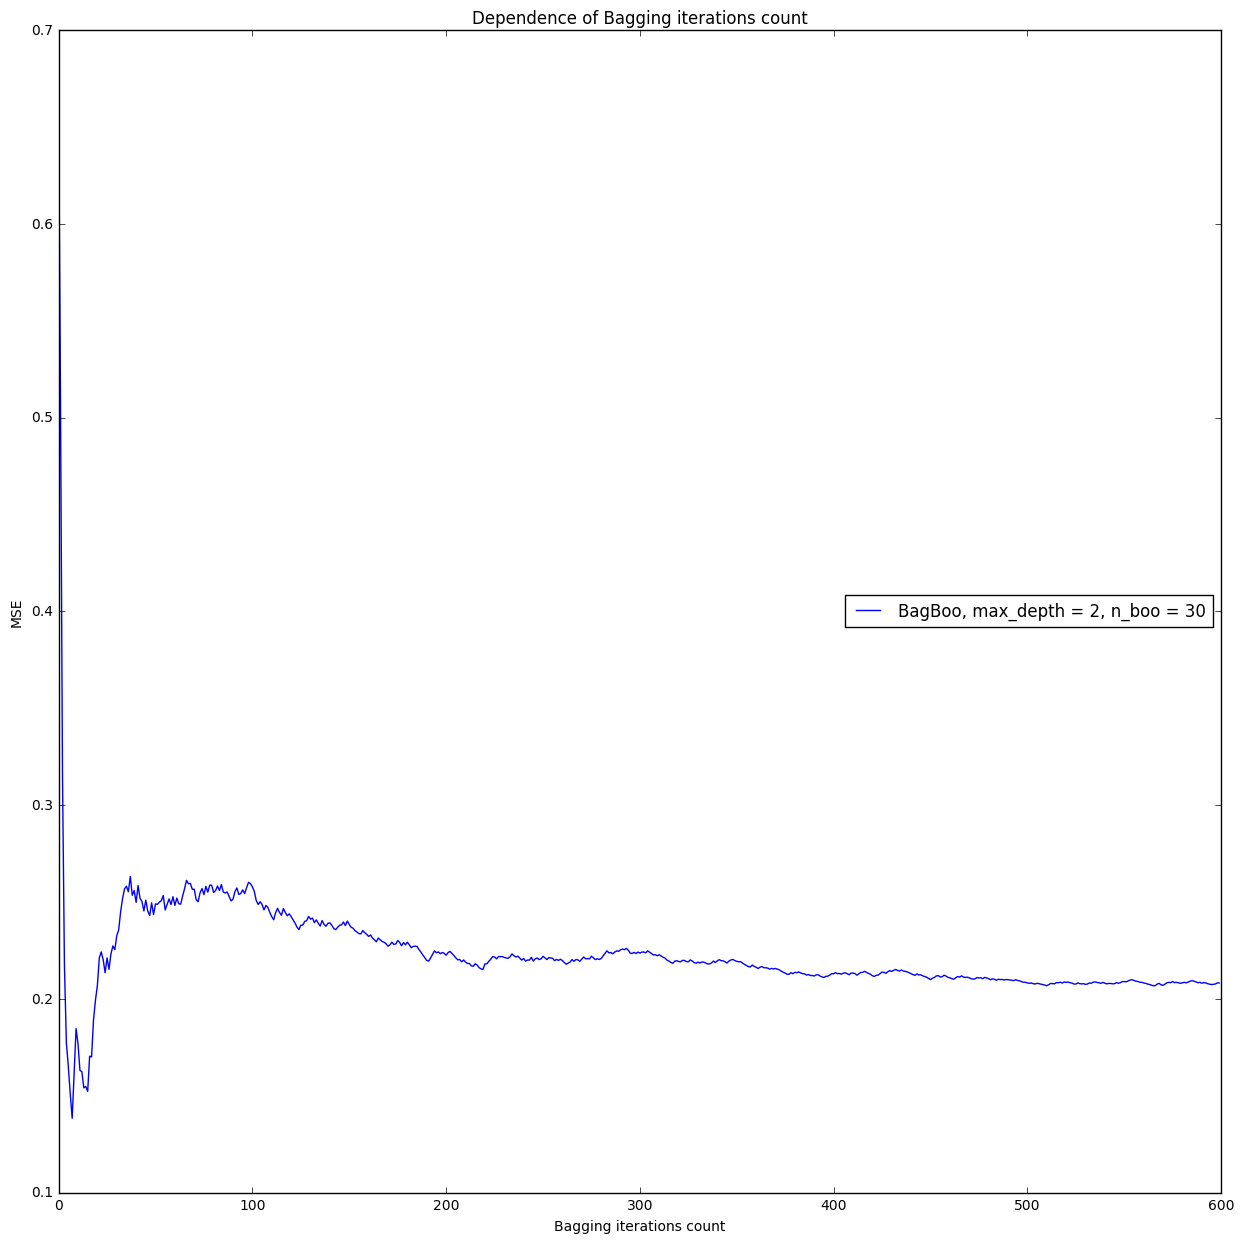

In [20]:
fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(range(0, 600), error_statistic_2, label='BagBoo, max_depth = 2, n_boo = 30')
ax.legend(loc='right')
ax.set_title('Dependence of Bagging iterations count')
ax.set_xlabel('Bagging iterations count')
ax.set_ylabel('MSE')